# Introduction


The company provided us two datasets, one which regards the orders starting from the 10/02/2020 to the 07/05/2021, the other one is a list of the products sold by the company.
The "orders" dataset contains a lot of important informations, like the date, the total expenditure, payment method, the purchased product, customer geolocalization and anagraphics.

First of all we implemented the procedure to import both datasets, then we printed them in order to check that we uploaded them in the correct way.
In addition to that we have created a unique customer id by joining 3 columns

In [1241]:
import pandas as pd
df_products=pd.read_excel("aziendaagricolaferri_products.xlsx")
df_orders=pd.read_excel("aziendaagricolaferri_orders_anon.xlsx")

In [1242]:
df_orders.rename(columns = {'Unnamed: 0':'index'}, inplace = True)
df_orders['customer_id']=df_orders['Fake_billing.first_name']+df_orders['Fake_billing.last_name']+df_orders['Fake_billing.email']
print(df_orders['customer_id'])

0      ZGAB41269020965501CFWJ54754923773841JMZE871592...
1      ZGAB41269020965501CFWJ54754923773841JMZE871592...
2      CLXE46929852075198CFWJ54754923773841JMZE871592...
3      RFSQ59205400950385JWEA43135901381996EKLC637523...
4      UJVG46347034532271SZJM80282263807089ATSO857429...
                             ...                        
543    IOER69892122222608WCDS85208208851060RLGU915378...
544    JMDY42245565086399PXHZ38624426686618JVIX122502...
545    CWOE25092516161402XZFU09651627229063OXOX723809...
546    HXKP91069862699585YQQT33124609571715JDCW384271...
547    HXKP91069862699585YQQT33124609571715JDCW384271...
Name: customer_id, Length: 548, dtype: object


In [1243]:
df_orders

,index,Unnamed: 0.1,id,parent_id,number,order_key,created_via,version,status,currency,date_created,date_created_gmt,date_modified,date_modified_gmt,discount_total,discount_tax,shipping_total,shipping_tax,cart_tax,total,total_tax,prices_include_tax,customer_id,customer_ip_address,customer_user_agent,payment_method,payment_method_title,transaction_id,date_paid,date_paid_gmt,date_completed,date_completed_gmt,cart_hash,meta_data,line_items,tax_lines,shipping_lines,fee_lines,coupon_lines,refunds,billing.city,billing.state,billing.postcode,billing.country,shipping.city,shipping.state,shipping.postcode,shipping.country,_links.self,_links.collection,Fake_billing.first_name,Fake_billing.last_name,Fake_billing.company,Fake_billing.address_1,Fake_billing.address_2,Fake_billing.email,Fake_billing.phone,Fake_shipping.first_name,Fake_shipping.last_name,Fake_shipping.company,Fake_shipping.address_1,Fake_shipping.address_2
0,0,0,1382,0,1382,wc_order_QcJCLom1HnnKK,checkout,3.8.1,processing,EUR,2021-05-07T07:39:56,2021-05-07T06:39:56,2021-05-07T07:39:56,2021-05-07T06:39:56,0.00,0,0.0,0,0,77.00,0,False,ZGAB41269020965501CFWJ54754923773841JMZE871592...,37.160.44.105,Mozilla/5.0 (Linux; Android 10; Redmi Note 7 B...,cod,Pagamento alla consegna,NaN,NaN,NaN,NaN,NaN,81c91abe1db6de0fb4785fb6b22c3ae3,"[{'id': 37483, 'key': 'mailchimp_woocommerce_c...","[{'id': 1731, 'name': 'Lattina da 5 Lt di olio...",[],"[{'id': 1732, 'method_title': 'Costi di Spediz...",[],[],[],Marcon,VE,30020,IT,Marcon,VE,30020,IT,[{'href': 'http://aziendaagricolaferri.com/wp-...,[{'href': 'http://aziendaagricolaferri.com/wp-...,ZGAB41269020965501,CFWJ54754923773841,UPAS50288279758937,WNNB13043406251041,KSQS07532927514011,JMZE87159295513272,RSQB07488343559075,UGLK17505927119926,NLSX54745286186894,JCKK68309069242447,RXXD87033655860571,AYUI85037015162708
1,1,1,1381,0,1381,wc_order_LqraYhI3nCDca,checkout,3.8.1,processing,EUR,2021-05-07T07:37:06,2021-05-07T06:37:06,2021-05-07T07:37:06,2021-05-07T06:37:06,0.00,0,0.0,0,0,77.00,0,False,ZGAB41269020965501CFWJ54754923773841JMZE871592...,37.160.44.105,Mozilla/5.0 (Linux; Android 10; Redmi Note 7 B...,cod,Pagamento alla consegna,NaN,NaN,NaN,NaN,NaN,81c91abe1db6de0fb4785fb6b22c3ae3,"[{'id': 37437, 'key': 'mailchimp_woocommerce_c...","[{'id': 1729, 'name': 'Lattina da 5 Lt di olio...",[],"[{'id': 1730, 'method_title': 'Costi di Spediz...",[],[],[],Marcon,VE,30020,IT,Marcon,VE,30020,IT,[{'href': 'http://aziendaagricolaferri.com/wp-...,[{'href': 'http://aziendaagricolaferri.com/wp-...,ZGAB41269020965501,CFWJ54754923773841,UPAS50288279758937,WNNB13043406251041,KSQS07532927514011,JMZE87159295513272,RSQB07488343559075,UGLK17505927119926,NLSX54745286186894,JCKK68309069242447,RXXD87033655860571,AYUI85037015162708
2,2,2,1380,0,1380,wc_order_hnGsEfPWqbMRR,checkout,3.8.1,processing,EUR,2021-05-07T07:29:39,2021-05-07T06:29:39,2021-05-07T07:29:39,2021-05-07T06:29:39,0.00,0,0.0,0,0,77.00,0,False,CLXE46929852075198CFWJ54754923773841JMZE871592...,37.160.44.105,Mozilla/5.0 (Linux; Android 10; Redmi Note 7 B...,cod,Pagamento alla consegna,NaN,NaN,NaN,NaN,NaN,efdebd1e390c3c846d86ff8ec6665f7c,"[{'id': 37391, 'key': 'mailchimp_woocommerce_c...","[{'id': 1727, 'name': '2 Lattine da 5 Lt di ol...",[],"[{'id': 1728, 'method_title': 'Costi di Spediz...",[],[],[],Marcon,VE,30020,IT,Marcon,VE,30020,IT,[{'href': 'http://aziendaagricolaferri.com/wp-...,[{'href': 'http://aziendaagricolaferri.com/wp-...,CLXE46929852075198,CFWJ54754923773841,UPAS50288279758937,PLOF44923047578028,KSQS07532927514011,JMZE87159295513272,KFHM33145864162687,PUCY64999338489058,NLSX54745286186894,JCKK68309069242447,QSSS86803272050501,AYUI85037015162708
3,3,3,1379,0,1379,wc_order_Yh8CjHACVb2y0,checkout,3.8.1,processing,EUR,2021-05-06T08:24:18,2021-05-06T07:24:18,2021-05-06T08:26:16,2021-05-06T07:26:16,0.00,0,0.0,0,0,154.00,0,False,RFSQ59205400950385JWEA43135901381996EKLC637523...,77.108.45.226,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,paypal,PayPal,8LH079486T656835U,2021-05-06T08:26:16,2021-

In [1244]:
df_products

,Unnamed: 0,id,name,slug,permalink,date_created,date_created_gmt,date_modified,date_modified_gmt,type,status,featured,catalog_visibility,description,short_description,sku,price,regular_price,sale_price,date_on_sale_from,date_on_sale_from_gmt,date_on_sale_to,date_on_sale_to_gmt,price_html,on_sale,purchasable,total_sales,virtual,downloadable,downloads,download_limit,download_expiry,external_url,button_text,tax_status,tax_class,manage_stock,stock_quantity,stock_status,backorders,backorders_allowed,backordered,sold_individually,weight,shipping_required,shipping_taxable,shipping_class,shipping_class_id,reviews_allowed,average_rating,rating_count,related_ids,upsell_ids,cross_sell_ids,parent_id,purchase_note,categories,tags,images,attributes,default_attributes,variations,grouped_products,menu_order,meta_data,dimensions.length,dimensions.width,dimensions.height,_links.self,_links.collection
0,0,1202,Magnum da 3 Litri “Nero di Troia” IGP in cassa...,magnum-da-3-litri-nero-di-troia-igp-in-cassa-d...,http://aziendaagricolaferri.com/prodotto/magnu...,2020-12-20T18:54:11,2020-12-20T17:54:11,2021-03-31T23:05:41,2021-03-31T22:05:41,simple,publish,False,visible,<p>Vino ottenuto da uve “Nero di Troia” prodot...,<p>Vino ottenuto da uve “Nero di Troia” prodot...,56,49.5,49.5,NaN,NaN,NaN,NaN,NaN,"<span class=""woocommerce-Price-amount amount"">...",False,True,0,False,False,[],-1,-1,NaN,NaN,taxable,NaN,False,NaN,instock,no,False,False,False,NaN,True,True,NaN,0,False,0.0,0,"[636, 164, 576, 168, 583]",[],[],0,NaN,"[{'id': 83, 'name': 'Cesti', 'slug': 'cesti'},...",[],"[{'id': 1203, 'date_created': '2020-12-20T18:5...",[],[],[],[],0,"[{'id': 28765, 'key': 'sm-show-manual', 'value...",NaN,NaN,NaN,[{'href': 'http://aziendaagricolaferri.com/wp-...,[{'href': 'http://aziendaagricolaferri.com/wp-...
1,1,1163,359 gr Olive nere condite in olio extra vergin...,359-gr-olive-nere-condite-in-olio-extra-vergin...,http://aziendaagricolaferri.com/prodotto/359-g...,2020-11-20T09:43:06,2020-11-20T08:43:06,2021-03-31T23:08:33,2021-03-31T22:08:33,simple,publish,False,visible,<p>359 gr Olive nere condite in olio extra ver...,<p>359 gr Olive nere condite in olio extra ver...,55,5.1,5.1,NaN,NaN,NaN,NaN,NaN,"<span class=""woocommerce-Price-amount amount"">...",False,True,18,False,False,[],-1,-1,NaN,NaN,taxable,NaN,False,NaN,instock,no,False,False,False,NaN,True,True,NaN,0,False,0.0,0,"[279, 276, 985, 1127, 1129]",[],[],0,NaN,"[{'id': 15, 'name': 'Conserve', 'slug': 'conse...",[],"[{'id': 1165, 'date_created': '2020-11-20T09:4...",[],[],[],[],0,"[{'id': 27155, 'key': 'sm-show-manual', 'value...",NaN,NaN,NaN,[{'href': 'http://aziendaagricolaferri.com/wp-...,[{'href': 'http://aziendaagricolaferri.com/wp-...
2,2,1160,359 gr Funghi pleurotus in olio extra vergine ...,359-gr-funghi-pleurotus-in-olio-extra-vergine-...,http://aziendaagricolaferri.com/prodotto/359-g...,2020-11-20T09:39:28,2020-11-20T08:39:28,2021-03-31T23:08:40,2021-03-31T22:08:40,simple,publish,False,visible,<p>359 gr Funghi pleurotus in olio extra vergi...,<p>359 gr Funghi pleurotus in olio extra vergi...,54,5.4,5.4,NaN,NaN,NaN,NaN,NaN,"<span class=""woocommerce-Price-amount amount"">...",False,True,5,False,False,[],-1,-1,NaN,NaN,taxable,NaN,False,NaN,instock,no,False,False,False,NaN,True,True,NaN,0,False,0.0,0,"[1129, 1163, 1148, 270, 279]",[],[],0,NaN,"[{'id': 15, 'name': 'Conserve', 'slug': 'conse...",[],"[{'id': 1162, 'date_created': '2020-11-20T09:3...",[],[],[],[],0,"[{'id': 27128, 'key': 'sm-show-manual', 'value...",NaN,NaN,NaN,[{'href': 'http://aziendaagricolaferri.com/wp-...,[{'href': 'http://aziendaagricolaferri.com/wp-...
3,3,1148,359 gr Lampascioni sott’olio con olio extra ve...,359-gr-lampascioni-sottolio-con-olio-extra-ver...,http://aziendaagricolaferri.com/prodotto/359-g...,2020-11-09T14:11:39,2020-11-09T13:11:39,2021-03-31T23:08:50,2021-03-31T22:08:50,simple,publish,False,visible,<p>359 gr Lampascioni sott’olio con olio extra...,<p>359 gr Lampascioni sott’olio con olio extra...,53,5.3,5.3,NaN,NaN,


# TASK 1
Concentration of oil buyers in cities/regions/areas (Italian market) 

In the first place we proceeded in a data cleaning step, because the original dataset cointained the city name randomly written. In fact some of them were in caps lock, others in capital letters and so on and so forth. After that we concentrated ourselves just on oil-buyers customers, creating a new column we labelled "oil_buyers", taking from the pre-existent column "line_items" the items we were interested in. Since we noticed that the company also sell other product "in oil" (sott'olio), we put into the code also the words "Lt" and "ml", in order to extract just the oil buyers. After having done that, we counted how many people actually buy oil, who are 476 individuals out of 548. Moreover, we implemented another datacleaning procedure. Because there were some missing values referred to the province of Napoli in the column "shipping.state", we wanted to insert the word "NA" to fill out the blank spaces. 

In [1245]:
df_orders["shipping.city"].str.lower()

0               marcon
1               marcon
2               marcon
3           mongardino
4                parma
            ...       
543             torino
544            ferrara
545    genzano di roma
546      ascoli piceno
547      ascoli piceno
Name: shipping.city, Length: 548, dtype: object

In [1246]:
search1=["100% Italiano","Lt di olio", "ml di olio"]
df_orders["oil_buyers"]=df_orders["line_items"].apply(lambda x:True if any(i in x for i in search1) else False)


In [1247]:
print(df_orders["oil_buyers"])

0       True
1       True
2       True
3       True
4       True
       ...  
543     True
544     True
545     True
546    False
547    False
Name: oil_buyers, Length: 548, dtype: bool


We have seen that 483 people buy oil, instead 65 don't buy oil

In [1248]:
df_orders["oil_buyers"].value_counts()

True     483
False     65
Name: oil_buyers, dtype: int64

We identified some missing values in the dataset, in particular in the shipping state column, therefore we filled them with the province they belong to: Napoli

In [1249]:
df_orders["shipping.state"].fillna("NA", inplace=True)

In [1250]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     548 non-null    int64  
 1   Unnamed: 0.1              548 non-null    int64  
 2   id                        548 non-null    int64  
 3   parent_id                 548 non-null    int64  
 4   number                    548 non-null    int64  
 5   order_key                 548 non-null    object 
 6   created_via               548 non-null    object 
 7   version                   548 non-null    object 
 8   status                    548 non-null    object 
 9   currency                  548 non-null    object 
 10  date_created              548 non-null    object 
 11  date_created_gmt          548 non-null    object 
 12  date_modified             548 non-null    object 
 13  date_modified_gmt         548 non-null    object 
 14  discount_t

In [1251]:
df_orders["shipping.state"].value_counts()

NA    57
RM    49
MI    36
TO    36
VI    22
      ..
NU     1
IS     1
PO     1
SV     1
SA     1
Name: shipping.state, Length: 73, dtype: int64

We created a new dataset with 2 columns that contains the shipping state and the oil buyers, removing the "false" ones. After it we extracted the frequencies and then plotted them in two graphs, in order to have an easier visualization of data. We noticed that the most-buying provinces are Napoli, Roma, Milano and Torino.

In [1252]:
oil_province = df_orders[["shipping.state","oil_buyers"]]

In [1253]:
print(oil_province)

    shipping.state  oil_buyers
0               VE        True
1               VE        True
2               VE        True
3               AT        True
4               PR        True
..             ...         ...
543             TO        True
544             FE        True
545             RM        True
546             AP       False
547             AP       False

[548 rows x 2 columns]


In [1254]:
a=[False]
oil_province=oil_province[~oil_province["oil_buyers"].isin(a)]
print(oil_province)

    shipping.state  oil_buyers
0               VE        True
1               VE        True
2               VE        True
3               AT        True
4               PR        True
..             ...         ...
541             MO        True
542             BO        True
543             TO        True
544             FE        True
545             RM        True

[483 rows x 2 columns]


In [1255]:
oil_province=oil_province[~oil_province["oil_buyers"].isin(a)]

In [1256]:
print(oil_province)

    shipping.state  oil_buyers
0               VE        True
1               VE        True
2               VE        True
3               AT        True
4               PR        True
..             ...         ...
541             MO        True
542             BO        True
543             TO        True
544             FE        True
545             RM        True

[483 rows x 2 columns]


In [1257]:
freq=oil_province["shipping.state"].value_counts()

In [1258]:
import matplotlib.pyplot as plt

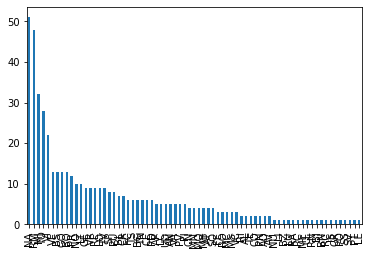

In [1259]:
freq.plot.bar()

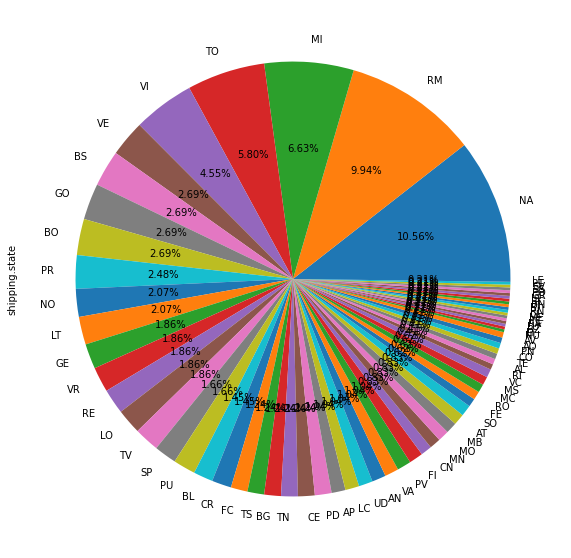

In [1260]:
freq.plot.pie(figsize=(15,10),autopct='%1.2f%%')

Here we splitted the provinces in 5 macro-areas and then we plotted the results. The oil buyers are highly concentrated in northern italy, almost 65% of them.

In [1261]:
list_nordovest=["GE","IM","SP","SV","BG","BS","CO","CR","LC","LO","MN","MI","MB","PV","SO","VA","AL","AT","BI","CN","NO","TO","VB","VC","AO"]
list_nordest=["BO","FE","FC","MO","PR","PC","RA","RE","RN","GO","PN","TS","UD","BZ","TN","BL","PD","RO","TV","VE","VR","VI"]
list_centro=["FR","LT","RI","RM","VT","AN","AP","FM","MC","PU","AR","FI","GR",'LI',"LU","MS","PI","PT","PO","SI", "PG","TR","RM"]
list_sud=["AQ","CZ","CH","CS","KR","PE","RC","TE","MT","PZ","VV","AV","BN","CE","NA","SA","CB","IS","BA","BT","BR","FG","LE","TA"]
list_isole= ["AG","CA","CL","CI","CT","EN","VS","ME","NU","OG","OT","OR","PA","RG","SS","SR","TP"]

In [1262]:
sum_isole=sum(oil_province[oil_province["shipping.state"].isin(list_isole)].value_counts('shipping.state'))
print(sum_isole)

4


In [1263]:
sum_centro=sum(oil_province[oil_province["shipping.state"].isin(list_centro)].value_counts('shipping.state'))
print(sum_centro)

94


In [1264]:
sum_sud=sum(oil_province[oil_province["shipping.state"].isin(list_sud)].value_counts('shipping.state'))
print(sum_sud)

65


In [1265]:
sum_nordest=sum(oil_province[oil_province["shipping.state"].isin(list_nordest)].value_counts('shipping.state'))
print(sum_nordest)

152


In [1266]:
sum_nordovest=sum(oil_province[oil_province["shipping.state"].isin(list_nordovest)].value_counts('shipping.state'))
print(sum_nordovest)

168


In [1267]:
oil_areas= {'Area': ['Nord est','Nord ovest','Centro','Sud','Isole'],'Freq_A':[sum_nordest,sum_nordovest,sum_centro,sum_sud,sum_isole]}
df_areas=pd.DataFrame(oil_areas,columns=['Area','Freq_A'])
print(df_areas)


         Area  Freq_A
0    Nord est     152
1  Nord ovest     168
2      Centro      94
3         Sud      65
4       Isole       4


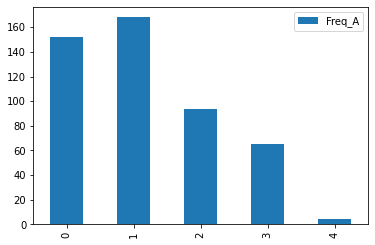

In [1268]:
df_areas.plot.bar()

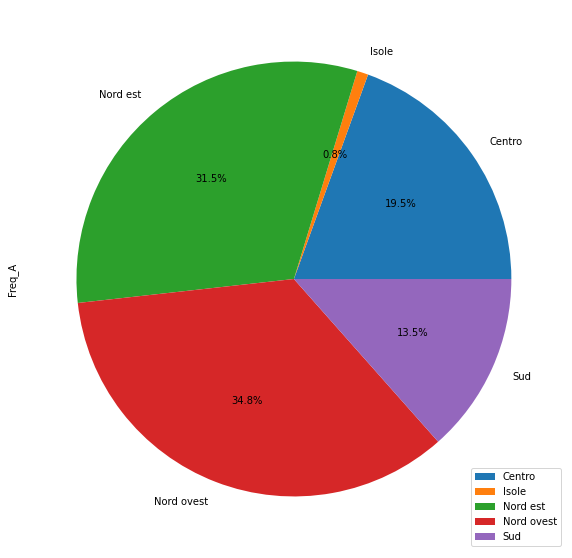

In [1269]:
df_areas.groupby(['Area']).sum().plot(kind='pie',y='Freq_A',figsize=(15,10),autopct='%1.1f%%')

**Managerial implication**

It clearly stands out that the main market for Ferri, at least for oil, is North Italy since it represents 65% of the total customers. At the same time, another important market it is also represented by the province of Rome and Naples. Ferri therefore should concentrated their effort in those areas since it is a good market for the oil products. 

One suggestion could be to implement the marketing in those areas in order to be more known by all the potential customers. Another possible suggestion could be to shortage the delivery of the products in these areas improving the logistic part related to the transportation or even think about opening a physic store in order to reduce the transportation cost and to be closer to their main customers. 

Regarding the other areas, they don’t represent a profitable market due to the low rate of selling. This could be explained by the fact that in the South and islands there is an higher offer of similar products with therefore an higher competition level. 

# TASK 2
Age buckets of oil buyers with frequency of purchase (and most frequent age group)

We were not able to address this question because the dataset does not contain any information about the age of the customers

# TASK 3
Interval between repeat purchase

First of all we identified different costumers based on their computer id, a unique code that uniquely represents a given physical device or machine. Then we created a table that pairs each ID with the relative purchase date. unfortunalty we werern't able to go on. 
We should have indentified all the costumer that did more than one purchase and create a code that allowed as to counts the time between the purchased date. We had problems in identify the correct loop in order to count down repeated purchased and calculate the time between them each time. 

 


In [1270]:
import numpy as np

dfdate = df_orders.dropna(subset=['date_paid'])
dfdate

,index,Unnamed: 0.1,id,parent_id,number,order_key,created_via,version,status,currency,date_created,date_created_gmt,date_modified,date_modified_gmt,discount_total,discount_tax,shipping_total,shipping_tax,cart_tax,total,total_tax,prices_include_tax,customer_id,customer_ip_address,customer_user_agent,payment_method,payment_method_title,transaction_id,date_paid,date_paid_gmt,date_completed,date_completed_gmt,cart_hash,meta_data,line_items,tax_lines,shipping_lines,fee_lines,coupon_lines,refunds,billing.city,billing.state,billing.postcode,billing.country,shipping.city,shipping.state,shipping.postcode,shipping.country,_links.self,_links.collection,Fake_billing.first_name,Fake_billing.last_name,Fake_billing.company,Fake_billing.address_1,Fake_billing.address_2,Fake_billing.email,Fake_billing.phone,Fake_shipping.first_name,Fake_shipping.last_name,Fake_shipping.company,Fake_shipping.address_1,Fake_shipping.address_2,oil_buyers
3,3,3,1379,0,1379,wc_order_Yh8CjHACVb2y0,checkout,3.8.1,processing,EUR,2021-05-06T08:24:18,2021-05-06T07:24:18,2021-05-06T08:26:16,2021-05-06T07:26:16,0.00,0,0.0,0,0,154.00,0,False,RFSQ59205400950385JWEA43135901381996EKLC637523...,77.108.45.226,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,paypal,PayPal,8LH079486T656835U,2021-05-06T08:26:16,2021-05-06T07:26:16,NaN,NaN,dae87b4b67fd57e5625053313bb69eb1,"[{'id': 37341, 'key': 'mailchimp_woocommerce_c...","[{'id': 1725, 'name': 'Lattina da 5 Lt di olio...",[],"[{'id': 1726, 'method_title': 'Costi di Spediz...",[],[],[],MONGARDINO,AT,14040,IT,MONGARDINO,AT,14040,IT,[{'href': 'http://aziendaagricolaferri.com/wp-...,[{'href': 'http://aziendaagricolaferri.com/wp-...,RFSQ59205400950385,JWEA43135901381996,UPAS50288279758937,LTYF39686440127045,KSQS07532927514011,EKLC63752364568697,QIWB89962954765769,MABC53123278057928,GJTV98903311820515,JCKK68309069242447,CCWN33567715385386,AYUI85037015162708,True
5,5,5,1377,0,1377,wc_order_LnF2KVtd6RG9H,checkout,3.8.1,completed,EUR,2021-05-03T20:50:24,2021-05-03T19:50:24,2021-05-04T07:22:19,2021-05-04T06:22:19,0.00,0,10.0,0,0,48.50,0,False,WMHI53777710887480GZNP78064719409865ZJEV595475...,82.56.55.111,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,paypal,PayPal,23L10759JL045961F,2021-05-03T20:53:16,2021-05-03T19:53:16,2021-05-04T07:22:19,2021-05-04T06:22:19,5294c3b7705885afd7eb98feedfa1d48,"[{'id': 37241, 'key': 'mailchimp_woocommerce_c...","[{'id': 1718, 'name': 'Lattina da 5 Lt di olio...",[],"[{'id': 1719, 'method_title': 'Costi di Spediz...",[],[],[],LUISAGO,CO,22070,IT,LUISAGO,CO,22070,IT,[{'href': 'http://aziendaagricolaferri.com/wp-...,[{'href': 'http://aziendaagricolaferri.com/wp-...,WMHI53777710887480,GZNP78064719409865,UPAS50288279758937,JPEA67916536306917,KSQS07532927514011,ZJEV59547512921614,RZRG82296491952048,HXZJ37419748969777,BRQP30854892337850,JCKK68309069242447,FPYD12164064639613,AYUI85037015162708,True
6,6,6,1376,0,1376,wc_order_sWzHUUsojZHkc,checkout,3.8.1,completed,EUR,2021-05-02T17:27:58,2021-05-02T16:27:58,2021-05-03T07:30:46,2021-05-03T06:30:46,0.00,0,0.0,0,0,69.30,0,False,JMDY42245565086399IXCO64737978655863OVGC324028...,79.44.94.24,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,stripe,Carta di Credito,ch_1Imi9EGvBj9gcwxofMowsp3v,2021-05-02T17:28:02,2021-05-02T16:28:02,2021-05-03T07:30:46,2021-05-03T06:30:46,fbc967df3614b053777499874e0a0b7d,"[{'id': 37165, 'key': 'mailchimp_woocommerce_c...","[{'id': 1713, 'name': 'Vassoio in legno marchi...",[],"[{'id': 1717, 'method_title': 'Costi di Spediz...",[],[],[],Travagliato Brescia,VR,25039,IT,Peschiera del garda,VR,37019,IT,[{'href': 'http://aziendaagricolaferri.com/wp-...,[{'href': 'http://aziendaagricolaferri.com/wp-...,JMDY42245565086399,IXCO64737978655863,UPAS50288279758937,DBPM68426177447948,KSQS07532927514011,OVGC32402803330428,AFUZ39592083893582,TZAQ23078791247532,GQCE71438374127099,JCKK68309069242447,DPFB94292705669128,AYUI85037015162708,True
7,7,7,1375,0,1375,wc_order_gwt5MxFKu02Nc,checkout,3.8.1,completed,EUR,2021-05-02T10:31:57,2021-05-02T09:31:57,202

In [1271]:
dfdate= dfdate[['customer_id','date_paid']]

dfdate = dfdate.sort_values('customer_id')
dfdate


,customer_id,date_paid
426,AHKP86865559996979SSUR16131560965363DUJK426337...,2020-04-26T19:39:06
63,AHQP89465822413203QCEQ21696229013418FKUD667584...,2021-03-25T13:22:41
518,AJWY63902597030875AEMQ03960364557788VXNJ203323...,2020-03-30T11:29:15
80,ANGA06129440452269BVUC96678542519007XPWW080633...,2021-03-17T17:04:20
210,ANGA06129440452269BVUC96678542519007XPWW080633...,2020-10-22T16:15:44
...,...,...
296,ZKPH59766147967225PEWJ12522895657514LKEL882526...,2020-06-17T17:30:19
293,ZKPH59766147967225PEWJ12522895657514LKEL882526...,2020-06-19T07:27:55
94,ZOCG92819289470766LWPP93389223442362YOOO489197...,2021-03-07T18:29:06
535,ZQJH98943386047219ZFYG70473586621458LANI816079...,2020-03-16T19:10:09


We tried to compute the difference among the payment dates with the following codes, however it doesn't work.

In [1272]:
#dfdate['days_since'] = dfdate['date_paid'].diff().dt.days

In [1273]:

#dfdate['Days'] = (dfdate.groupby('customer_id', group_keys=False)
  #              .apply(lambda g: g['date_paid'].diff().replace(0, np.nan).ffill()))
#dfdate

In [1274]:
dfnew = dfdate.groupby('customer_id')
dfnew.sum()

,date_paid
customer_id,
AHKP86865559996979SSUR16131560965363DUJK42633714283702,2020-04-26T19:39:06
AHQP89465822413203QCEQ21696229013418FKUD66758461993493,2021-03-25T13:22:41
AJWY63902597030875AEMQ03960364557788VXNJ20332325508065,2020-03-30T11:29:15
ANGA06129440452269BVUC96678542519007XPWW08063359924765,2021-03-17T17:04:202020-10-22T16:15:442020-05-...
ANGA06129440452269BZRB46247082525571TJPH13343560789755,2020-04-28T18:16:24
...,...
ZKPH59766147967225OHJC23017098569580BAKT43973428149738,2020-12-06T15:43:452020-10-06T09:11:21
ZKPH59766147967225PEWJ12522895657514LKEL88252662551230,2020-06-17T17:30:192020-06-19T07:27:55
ZOCG92819289470766LWPP93389223442362YOOO48919773735041,2021-03-07T18:29:06


# TASK 4
Recommended products connected to top selling ones

Firstly, we have selected the columns in the original file df_products that we were interested in for solve this task: “id”, “total_sales”, “related_ids”. At this point we had all the information needed in order to sort all the “total_sales” and then to select only the products (“id”) that has been more sold. For doing so we have create another dataset “above_70” with only the values of the sorted column “total_sales” above 70. 

In [1275]:
top_selling=df_products[["id","total_sales"]]

In [1276]:
print(top_selling)

      id  total_sales
0   1202            0
1   1163           18
2   1160            5
3   1148            7
4   1146            9
..   ...          ...
93   134          183
94    57            2
95    55           21
96    51          126
97    47            0

[98 rows x 2 columns]


In [1277]:
top_selling.sort_values("total_sales")

,id,total_sales
0,1202,0
32,575,0
34,572,0
36,355,0
38,287,0
...,...,...
57,256,98
96,51,126
92,136,166
93,134,183


In [1278]:
above_70=top_selling[top_selling["total_sales"] > 70]
print(above_70)

      id  total_sales
9   1092           93
57   256           98
89   144           82
91   139          247
92   136          166
93   134          183
96    51          126


The output of this porcess was the identification of the top selling products that are respectively: id 139,  id 134, id 136, id 51, id 256, id 1092, id 144 (odered by total_sales). 

Secondly, we have proceeded with the identification of the related products with the following procedure.
As a first step, we split the line_items column, which contained several elements within it, including the product id and the quantity purchased.

In [1279]:
import ast
df_orders['line_items'] = df_orders['line_items'].apply(lambda row : ast.literal_eval(row)) 

In [1280]:
out = {}
for i, (x,y) in enumerate(df_orders['line_items'].items()):
  df3 = pd.DataFrame(y)
  if df3.empty:
    out[(i,x)]=pd.DataFrame(index[0], columns=['product_id'])
  else :
    out[(i,x)]=df3
df4 = pd.concat(out, sort=True).reset_index(level=[0,2], drop=True)
df4

,id,meta_data,name,price,product_id,quantity,sku,subtotal,subtotal_tax,tax_class,taxes,total,total_tax,variation_id
0,1731,[],Lattina da 5 Lt di olio extra vergine d’oliva ...,38.50,134,2,001,77.00,0.00,,[],77.00,0.00,0
1,1729,[],Lattina da 5 Lt di olio extra vergine d’oliva ...,38.50,134,2,001,77.00,0.00,,[],77.00,0.00,0
2,1727,[],2 Lattine da 5 Lt di olio extra vergine d’oliv...,77.00,136,1,002,77.00,0.00,,[],77.00,0.00,0
3,1725,[],Lattina da 5 Lt di olio extra vergine d’oliva ...,38.50,134,4,001,154.00,0.00,,[],154.00,0.00,0
4,1720,[],Lattina da 5 Lt di olio extra vergine d’oliva ...,38.50,134,1,001,38.50,0.00,,[],38.50,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,17,[],290 gr Melanzane caserecce sott'olio con olio ...,6.00,265,1,025,6.00,0.00,,[],6.00,0.00,0
544,18,[],Lattina da 3 Lt di olio extra vergine d’oliva ...,18.90,139,1,003,21.00,0.00,,[],18.90,0.00,0
545,13,[],Lattina da 3 Lt di olio extra vergine d’oliva ...,21.00,139,2,003,42.00,0.00,,[],42.00,0.00,0
546,10,[],250 gr Confezione di taralli tradizionali fatt...,0.03,256,1,029,3.00,0.00,,[],0.03,0.00,0


From the pivot table we see all products purchased and their respective quantities 

In [1281]:
pivot_orders = pd.pivot_table(df4, values = 'quantity', index=['product_id','name'], aggfunc=np.sum)
pivot_orders = pivot_orders.sort_values('quantity', ascending=False)
pivot_orders

,,quantity
product_id,name,
139,Lattina da 3 Lt di olio extra vergine d’oliva 100% Italiano,251
134,Lattina da 5 Lt di olio extra vergine d’oliva 100% Italiano,182
136,2 Lattine da 5 Lt di olio extra vergine d’oliva 100% Italiano,163
51,1 Lt di olio extra vergine d’oliva 100% italiano,116
1092,Passata di pomodoro casereccia da 580 Gr,93
256,250 gr Confezione di taralli tradizionali fatti con olio extra vergine d'oliva,89
144,6 Bottiglie da 1 Lt di olio extra vergine d’oliva 100% Italiano,83
142,4 Lattine da 3 Lt di olio extra vergine d’oliva 100% Italiano,70
158,Bottiglia da 750 ml di vino bianco D.O.C. Castel del Monte,46


In order to analyse the correlation between products, first of all we have to merge the two datasets in order to match the products and quantities to the unique id of the consumer.


In [1282]:
dfmerge = pd.merge(df_orders,df4,
                   left_on='index',
                   right_index=True,
                   how='inner')
dfmerge

,index,Unnamed: 0.1,id_x,parent_id,number,order_key,created_via,version,status,currency,date_created,date_created_gmt,date_modified,date_modified_gmt,discount_total,discount_tax,shipping_total,shipping_tax,cart_tax,total_x,total_tax_x,prices_include_tax,customer_id,customer_ip_address,customer_user_agent,payment_method,payment_method_title,transaction_id,date_paid,date_paid_gmt,date_completed,date_completed_gmt,cart_hash,meta_data_x,line_items,tax_lines,shipping_lines,fee_lines,coupon_lines,refunds,billing.city,billing.state,billing.postcode,billing.country,shipping.city,shipping.state,shipping.postcode,shipping.country,_links.self,_links.collection,Fake_billing.first_name,Fake_billing.last_name,Fake_billing.company,Fake_billing.address_1,Fake_billing.address_2,Fake_billing.email,Fake_billing.phone,Fake_shipping.first_name,Fake_shipping.last_name,Fake_shipping.company,Fake_shipping.address_1,Fake_shipping.address_2,oil_buyers,id_y,meta_data_y,name,price,product_id,quantity,sku,subtotal,subtotal_tax,tax_class,taxes,total_y,total_tax_y,variation_id
0,0,0,1382,0,1382,wc_order_QcJCLom1HnnKK,checkout,3.8.1,processing,EUR,2021-05-07T07:39:56,2021-05-07T06:39:56,2021-05-07T07:39:56,2021-05-07T06:39:56,0.00,0,0.0,0,0,77.00,0,False,ZGAB41269020965501CFWJ54754923773841JMZE871592...,37.160.44.105,Mozilla/5.0 (Linux; Android 10; Redmi Note 7 B...,cod,Pagamento alla consegna,NaN,NaN,NaN,NaN,NaN,81c91abe1db6de0fb4785fb6b22c3ae3,"[{'id': 37483, 'key': 'mailchimp_woocommerce_c...","[{'id': 1731, 'name': 'Lattina da 5 Lt di olio...",[],"[{'id': 1732, 'method_title': 'Costi di Spediz...",[],[],[],Marcon,VE,30020,IT,Marcon,VE,30020,IT,[{'href': 'http://aziendaagricolaferri.com/wp-...,[{'href': 'http://aziendaagricolaferri.com/wp-...,ZGAB41269020965501,CFWJ54754923773841,UPAS50288279758937,WNNB13043406251041,KSQS07532927514011,JMZE87159295513272,RSQB07488343559075,UGLK17505927119926,NLSX54745286186894,JCKK68309069242447,RXXD87033655860571,AYUI85037015162708,True,1731,[],Lattina da 5 Lt di olio extra vergine d’oliva ...,38.50,134,2,001,77.00,0.00,,[],77.00,0.00,0
1,1,1,1381,0,1381,wc_order_LqraYhI3nCDca,checkout,3.8.1,processing,EUR,2021-05-07T07:37:06,2021-05-07T06:37:06,2021-05-07T07:37:06,2021-05-07T06:37:06,0.00,0,0.0,0,0,77.00,0,False,ZGAB41269020965501CFWJ54754923773841JMZE871592...,37.160.44.105,Mozilla/5.0 (Linux; Android 10; Redmi Note 7 B...,cod,Pagamento alla consegna,NaN,NaN,NaN,NaN,NaN,81c91abe1db6de0fb4785fb6b22c3ae3,"[{'id': 37437, 'key': 'mailchimp_woocommerce_c...","[{'id': 1729, 'name': 'Lattina da 5 Lt di olio...",[],"[{'id': 1730, 'method_title': 'Costi di Spediz...",[],[],[],Marcon,VE,30020,IT,Marcon,VE,30020,IT,[{'href': 'http://aziendaagricolaferri.com/wp-...,[{'href': 'http://aziendaagricolaferri.com/wp-...,ZGAB41269020965501,CFWJ54754923773841,UPAS50288279758937,WNNB13043406251041,KSQS07532927514011,JMZE87159295513272,RSQB07488343559075,UGLK17505927119926,NLSX54745286186894,JCKK68309069242447,RXXD87033655860571,AYUI85037015162708,True,1729,[],Lattina da 5 Lt di olio extra vergine d’oliva ...,38.50,134,2,001,77.00,0.00,,[],77.00,0.00,0
2,2,2,1380,0,1380,wc_order_hnGsEfPWqbMRR,checkout,3.8.1,processing,EUR,2021-05-07T07:29:39,2021-05-07T06:29:39,2021-05-07T07:29:39,2021-05-07T06:29:39,0.00,0,0.0,0,0,77.00,0,False,CLXE46929852075198CFWJ54754923773841JMZE871592...,37.160.44.105,Mozilla/5.0 (Linux; Android 10; Redmi Note 7 B...,cod,Pagamento alla consegna,NaN,NaN,NaN,NaN,NaN,efdebd1e390c3c846d86ff8ec6665f7c,"[{'id': 37391, 'key': 'mailchimp_woocommerce_c...","[{'id': 1727, 'name': '2 Lattine da 5 Lt di ol...",[],"[{'id': 1728, 'method_title': 'Costi di Spediz...",[],[],[],Marcon,VE,30020,IT,Marcon,VE,30020,IT,[{'href': 'http://aziendaagricolaferri.com/wp-...,[{'href': 'http://aziendaagricolaferri.com/wp-...,CLXE46929852075198,CFWJ54754923773841,UPAS50288279758937,PLOF44923047578028,KSQS07532927514011,JMZE87159295513272,KFHM33145864162687,PUCY64999338489058,NLSX54745286186894,JCKK68309069242447,QSSS86803272050501,AYUI85037015162

In [1283]:

dffinal = dfmerge[['customer_id','name','product_id','quantity']]
dffinal

,customer_id,name,product_id,quantity
0,ZGAB41269020965501CFWJ54754923773841JMZE871592...,Lattina da 5 Lt di olio extra vergine d’oliva ...,134,2
1,ZGAB41269020965501CFWJ54754923773841JMZE871592...,Lattina da 5 Lt di olio extra vergine d’oliva ...,134,2
2,CLXE46929852075198CFWJ54754923773841JMZE871592...,2 Lattine da 5 Lt di olio extra vergine d’oliv...,136,1
3,RFSQ59205400950385JWEA43135901381996EKLC637523...,Lattina da 5 Lt di olio extra vergine d’oliva ...,134,4
4,UJVG46347034532271SZJM80282263807089ATSO857429...,Lattina da 5 Lt di olio extra vergine d’oliva ...,134,1
...,...,...,...,...
544,JMDY42245565086399PXHZ38624426686618JVIX122502...,290 gr Melanzane caserecce sott'olio con olio ...,265,1
544,JMDY42245565086399PXHZ38624426686618JVIX122502...,Lattina da 3 Lt di olio extra vergine d’oliva ...,139,1
545,CWOE25092516161402XZFU09651627229063OXOX723809...,Lattina da 3 Lt di olio extra vergine d’oliva ...,139,2
546,HXKP91069862699585YQQT33124609571715JDCW384271...,250 gr Confezione di taralli tradizionali fatt...,256,1


In [1284]:
pivot = dffinal.pivot_table(index='name',columns='customer_id',values='quantity',aggfunc='sum')
pivot=pivot.applymap(lambda x:x if x>0 else 0)
pivot

customer_id,AHKP86865559996979SSUR16131560965363DUJK42633714283702,AHQP89465822413203QCEQ21696229013418FKUD66758461993493,AJWY63902597030875AEMQ03960364557788VXNJ20332325508065,ANGA06129440452269BVUC96678542519007XPWW08063359924765,ANGA06129440452269BZRB46247082525571TJPH13343560789755,ANGA06129440452269FUYX73198934436444HXNR33139950986905,ANGA06129440452269IPGC43079013605614HCDR97643405272549,ANGA06129440452269SMVE92546077864675ICMH96452717787863,ANGA06129440452269UCWT72209273743663RGQN54261092796876,AQLG63353163008623WDGF59618624127525HVJR34664314662370,AQLG63353163008623WHLO77777464336607WJLG07519786833174,AQLG63353163008623WQSU06672680099067KRVJ17426823634447,AUNT67311907164381VVPJ15787433289237CJPH11454665031018,AVDS65513679727134ADCQ34604779771371WFXP12433510746640,AVDS65513679727134CJBE61495532856474BXLS21469788930935,AVDS65513679727134CUOC21606464206784WHFD46493720296823,AVDS65513679727134JTDT60412387880274OBXO13178778720510,AVDS65513679727134KHOL63641697850358ALYV50098784884426,AVDS65513679727134KJHL89628588157592EUJO22828565180164,AVDS65513679727134KMWH64462795232337TDMI75077161440803,AVDS65513679727134QWYN04281940722380VIOU78282724781746,AVPX10407571274319EAQH40328181722633GFOT58628048143953,AVPX10407571274319FVJD62088530418200GUAH91032683814761,AVPX10407571274319KHOL63641697850358RLFA51622613730669,AVVB34471443575737QWSP39019412031158KEGH76181947021849,AVVB34471443575737RGSX18752193726320FOAC59767030606829,AVVB34471443575737RLCJ06701044028678JTIV08333294638913,AVVB34471443575737TFXX21644135252756NIYM64162229458414,AVVB34471443575737WKFM84010592392743AUHQ03278915401614,AWMI60652975556580RFOD73299367893067KSRE57443447945037,AXZC12535156833557DZCB63896375443797SPJR27448304152830,AXZC12535156833557TOKK91442287839096PIWB06162536258686,BAYL45312278894028GXTG66380553779690XSJE64391313842979,BAYL45312278894028ZBHT48680296195859SZNT27870283974421,BEZI87504107765154IFXG16021795075458LHOS46148870280452,BISF09973641236511IFXT80353974938768QUDU30245916862548,BISF09973641236511ZAPC46875239632289TQFX59400989171598,BKEQ34310992377272HPFU99060758406624AVQM11907044148569,BQQM41818337339890CQXP54512095240768CAKV32679179319397,BQQM41818337339890IVAF84698114424806NOKS62320757360729,...,XDAP93549976099086VFDV75124287603891FPEF73668042691827,XECL67714391882849RATW80373918985331OCKG24736187673650,XGDA91886732721082OVII29576259700223DTDG58546039163102,XGQL79911889949617ALXY71926952756756XQUI26492185544123,XGQL79911889949617ZEOX16582082994140VLIV21919850521707,XGQL79911889949617ZKLZ68023646178006ACRG04062717215302,XGQL79911889949617ZKLZ68023646178006COYS79692318624595,XHHG07036319925344YNRE66566641937209JSTJ98271264385362,XLPT37706130149001HMVZ35523274355217ADQY54174998278139,XXFB04296284194905ZMDQ54962589724027AQJT23520120995062,XZTJ15234449867332KMAA61182040076167ELQY06389598654123,XZTJ15234449867332KMAA61182040076167ZACQ08856128714285,YECY00202862612112QVBW67269979145293TQFX59400989171598,YIKN83458319055697PERH94605248372152VMFY84486686680385,YIKN83458319055697RXOW84784885926010VMFY84486686680385,YIKN83458319055697VMZV74524621787517DXQP86533840947899,YIKN83458319055697WFVX13675950405270WARH82372792915181,YJWB40971669320192VFZE41900769441365PCGF16977778934670,YJWB40971669320192VFZE41900769441365YWKA92659207489015,YKTN39606835841085GBAM86353679966188NCUK69425476647318,YKTN39606835841085JFKJ74090291646709TBWS10794761096403,YMAD21812024734050ZCKL12112929324432SGSU88746543099298,YNMT62961359068833SFYU65595566615250OGEY32722942811024,YOVW56884955967661YGTA90700265886319SFDH92334825067788,YQHM66425016112036PYEE42724652299520MFNL16275365457943,YSOU34654192614892BEMT99525106905161FRVX97400681238575,YSOU34654192614892FGTK92543346971017LXQF23989093031555,ZCIK73059972568366OKVG19966694692847DDJF96473674475637,ZCIK73059972568366ZLND74416576969980AGGB13814351242396,ZFWD37043243603129GEBO22783460826587GWHP63142242434061,ZGAB41269020965501CFWJ54754923773841JMZE87159295513272,ZHYH57224268143618EXSB05135470407544FRWW53436718331827,ZHYH57224268143618UYEX74

After having made a cross pivot between id and the purchased product, it is possible to implement a correlation between the purchased products with the following commands

In [1285]:
from sklearn.metrics.pairwise import cosine_similarity

ML = pd.DataFrame(cosine_similarity(pivot))
ML.columns = pivot.index
ML['name'] = pivot.index
ML = ML.set_index('name')
ML1 = ML['Lattina da 3 Lt di olio extra vergine d’oliva 100% Italiano'].sort_values(ascending=False)[1:6]
ML2 = ML['Lattina da 5 Lt di olio extra vergine d’oliva 100% Italiano'].sort_values(ascending=False)[1:6]
ML3 = ML['2 Lattine da 5 Lt di olio extra vergine d’oliva 100% Italiano'].sort_values(ascending=False)[1:6]

In [1286]:
ML1
#'Lattina da 3 Lt di olio extra vergine d’oliva 100% Italiano'

name
290 gr Pomodori secchi sott'olio con olio extra vergine d'oliva                           0.295547
290 gr Melanzane caserecce sott'olio con olio extra vergine d'oliva                       0.246131
Bottiglia da 250 ml con tappo antirabbocco di olio extra vergine d'oliva 100% Italiano    0.243512
359 gr Zucchine alla brace sott'olio con olio extra vergine d'oliva                       0.211925
359 gr Involtini di Melanzane sott’olio con olio extra vergine d’oliva                    0.203095
Name: Lattina da 3 Lt di olio extra vergine d’oliva 100% Italiano, dtype: float64

In [1287]:
ML2
#'Lattina da 5 Lt di olio extra vergine d’oliva 100% Italiano'

name
290 gr Carciofi grigliati sott'olio con olio extra vergine d'oliva    0.197268
290 gr Cime di Rapa in olio extra vergine di oliva                    0.169409
2 Lattine da 5 Lt di olio extra vergine d’oliva 100% Italiano         0.160996
Passata di pomodoro casereccia da 580 Gr                              0.130921
359 gr Cipolline grigliate in olio extra vergine di oliva             0.118378
Name: Lattina da 5 Lt di olio extra vergine d’oliva 100% Italiano, dtype: float64

In [1288]:
ML3
#'2 Lattine da 5 Lt di olio extra vergine d’oliva 100% Italiano'

name
Valigetta con assaggi assortiti (2 confezioni di conserve, olio, vino rosato)           0.183513
Valigetta con 3 vasetti da 290 gr di misto sott’olio con olio extra vergine di oliva    0.175863
290 gr Funghi cardoncelli sott'olio con olio extra vergine d'oliva                      0.162818
Lattina da 5 Lt di olio extra vergine d’oliva 100% Italiano                             0.160996
Valigetta con 3 bottiglie da 750 ml di vino D.O.C. Castel del Monte MIX                 0.157297
Name: 2 Lattine da 5 Lt di olio extra vergine d’oliva 100% Italiano, dtype: float64

We decided to represent the 5 most related products to the 3 best-selling products. This gives the possibility to recommend to customers or to create bundles of related products, in order to implement a good up-selling strategy.

# TASK 5
Smart visualizations of best selling products

We created a new dataset which contained the top selling products which have been sold more than 70 times, we choose this threshold after various trials and this one is the most relevant for our analysis.
Then we plotted these best-selling product through a bar chart.

In [1289]:
top_selling=df_products[["id","total_sales","price","related_ids",'name']]
above_70=top_selling[top_selling["total_sales"] > 70]
above_70

,id,total_sales,price,related_ids,name
9,1092,93,2.0,"[256, 985, 265, 279, 276]",Passata di pomodoro casereccia da 580 Gr
57,256,98,3.3,"[1129, 279, 282, 276, 262]",250 gr Confezione di taralli tradizionali fatt...
89,144,82,52.8,"[147, 51, 139, 573, 570]",6 Bottiglie da 1 Lt di olio extra vergine d’ol...
91,139,247,23.1,"[134, 147, 136, 144, 142]",Lattina da 3 Lt di olio extra vergine d’oliva ...
92,136,166,77.0,"[154, 570, 142, 573, 149]",2 Lattine da 5 Lt di olio extra vergine d’oliv...
93,134,183,38.5,"[139, 154, 47, 570, 149]",Lattina da 5 Lt di olio extra vergine d’oliva ...
96,51,126,8.8,"[154, 134, 570, 144, 573]",1 Lt di olio extra vergine d’oliva 100% italiano


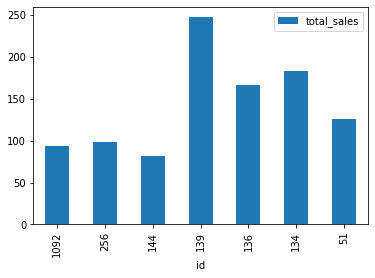

In [1290]:
above_70.plot.bar("id","total_sales")

The bar chart is simply a representation of the quantity of sales of the top products where on the x-axes we haave the 7 top_selling prodcts and on the y-axes the quantity of sales. 

**id 1092** = Passata di pomodoro casereccia da 580 Gr

**id 256** = 250 gr Confezione di taralli tradizionali fatti con olio extra vergine d'oliva

**id 144** = 6 Bottiglie da 1 Lt di olio extra vergine d’oliva 100% Italiano

**id 139** = Lattina da 3 Lt di olio extra vergine d’oliva 100% Italiano

**id 136** = 2 Lattine da 5 Lt di olio extra vergine d’oliva 100% Italiano

**id 134** = Lattina da 5 Lt di olio extra vergine d’oliva 100% Italiano

**id 51** = 1 Lt di olio extra vergine d’oliva 100% italiano

At this point, we have created a new column "sales" which is the moltiplication between prices and sold quantities in order to compute the total revenue generated by each product. Moreover, we plotted sales and quantity in order to visually compare them.

In [1415]:
above_70["sales"]=above_70["total_sales"]*above_70["price"]
above_70

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,total_sales,price,related_ids,name,sales
9,1092,93,2.0,"[256, 985, 265, 279, 276]",Passata di pomodoro casereccia da 580 Gr,186.0
57,256,98,3.3,"[1129, 279, 282, 276, 262]",250 gr Confezione di taralli tradizionali fatt...,323.4
89,144,82,52.8,"[147, 51, 139, 573, 570]",6 Bottiglie da 1 Lt di olio extra vergine d’ol...,4329.6
91,139,247,23.1,"[134, 147, 136, 144, 142]",Lattina da 3 Lt di olio extra vergine d’oliva ...,5705.7
92,136,166,77.0,"[154, 570, 142, 573, 149]",2 Lattine da 5 Lt di olio extra vergine d’oliv...,12782.0
93,134,183,38.5,"[139, 154, 47, 570, 149]",Lattina da 5 Lt di olio extra vergine d’oliva ...,7045.5
96,51,126,8.8,"[154, 134, 570, 144, 573]",1 Lt di olio extra vergine d’oliva 100% italiano,1108.8


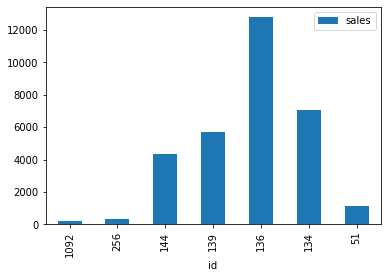

In [1292]:
above_70.plot.bar("id","sales")

This bar chart differs form the one above since on the y-axes we have the value in € that has been sold for each top_selling products. 
It is interesting to point out that nevertheless the **id 139** was the product more sold in terms of quantity it is only at the third position in terms of revenue generated, intead the most profitable top selling prodcuts is represented by **id 136** followed by **id 134**.

Moreover, the top selling products **id1092**, **id256** and **id 51** are not perfroming well at all in terms of revenue generated even if they have quite high level of selling in terms of numbers. 

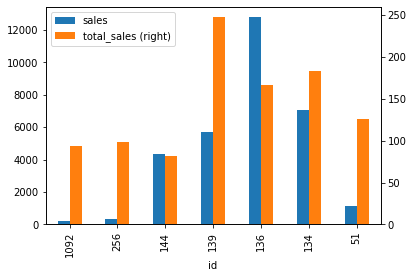

In [1293]:
above_70.plot.bar("id",{'total_sales','sales'},secondary_y=['total_sales'])

This bar chart is the combination of the previous one and here it is more clear the fact that even if the **id 139** is the product which sells the most, it is just 3rd in terms of revenues generated. In addition, **id 136** is the 3rd in terms of quantity but it is the 1st in terms of revenues accounting for 12782€.

At this point, we wanted to undertand how much the top selling products counts in terms of total revenue.
In order to do this we have calculated, in the new column "sales", all the revenue for each product. Summing up that column we have found out that the tota revenue accounts for almost 46.723€. Thanks to this data we have then calculated the percentage for each produtcs.

In [1294]:
above_70[["id","related_ids",'name']].head()

,id,related_ids,name
9,1092,"[256, 985, 265, 279, 276]",Passata di pomodoro casereccia da 580 Gr
57,256,"[1129, 279, 282, 276, 262]",250 gr Confezione di taralli tradizionali fatt...
89,144,"[147, 51, 139, 573, 570]",6 Bottiglie da 1 Lt di olio extra vergine d’ol...
91,139,"[134, 147, 136, 144, 142]",Lattina da 3 Lt di olio extra vergine d’oliva ...
92,136,"[154, 570, 142, 573, 149]",2 Lattine da 5 Lt di olio extra vergine d’oliv...


In [1416]:
revenue_top=df_products[["id","total_sales","price",'name']]
revenue_top

,id,total_sales,price,name
0,1202,0,49.5,Magnum da 3 Litri “Nero di Troia” IGP in cassa...
1,1163,18,5.1,359 gr Olive nere condite in olio extra vergin...
2,1160,5,5.4,359 gr Funghi pleurotus in olio extra vergine ...
3,1148,7,5.3,359 gr Lampascioni sott’olio con olio extra ve...
4,1146,9,5.7,359 gr Involtini di Melanzane sott’olio con ol...
...,...,...,...,...
93,134,183,38.5,Lattina da 5 Lt di olio extra vergine d’oliva ...
94,57,2,16.5,Valigetta con 3 bottiglie da 750 ml di vino ro...
95,55,21,4.9,Bottiglia da 750 ml di vino rosso D.O.C. Caste...
96,51,126,8.8,1 Lt di olio extra vergine d’oliva 100% italiano


In [1417]:
revenue_top["sales"]=revenue_top["total_sales"]*revenue_top["price"]
revenue_top

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,total_sales,price,name,sales
0,1202,0,49.5,Magnum da 3 Litri “Nero di Troia” IGP in cassa...,0.0
1,1163,18,5.1,359 gr Olive nere condite in olio extra vergin...,91.8
2,1160,5,5.4,359 gr Funghi pleurotus in olio extra vergine ...,27.0
3,1148,7,5.3,359 gr Lampascioni sott’olio con olio extra ve...,37.1
4,1146,9,5.7,359 gr Involtini di Melanzane sott’olio con ol...,51.3
...,...,...,...,...,...
93,134,183,38.5,Lattina da 5 Lt di olio extra vergine d’oliva ...,7045.5
94,57,2,16.5,Valigetta con 3 bottiglie da 750 ml di vino ro...,33.0
95,55,21,4.9,Bottiglia da 750 ml di vino rosso D.O.C. Caste...,102.9
96,51,126,8.8,1 Lt di olio extra vergine d’oliva 100% italiano,1108.8


In [1418]:
sum_sales=revenue_top["sales"].sum()
print(sum_sales)

46722.90000000001


In [1419]:
revenue_top["%"]=revenue_top["sales"]/sum_sales*100
revenue_top

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,total_sales,price,name,sales,%
0,1202,0,49.5,Magnum da 3 Litri “Nero di Troia” IGP in cassa...,0.0,0.000000
1,1163,18,5.1,359 gr Olive nere condite in olio extra vergin...,91.8,0.196478
2,1160,5,5.4,359 gr Funghi pleurotus in olio extra vergine ...,27.0,0.057788
3,1148,7,5.3,359 gr Lampascioni sott’olio con olio extra ve...,37.1,0.079404
4,1146,9,5.7,359 gr Involtini di Melanzane sott’olio con ol...,51.3,0.109796
...,...,...,...,...,...,...
93,134,183,38.5,Lattina da 5 Lt di olio extra vergine d’oliva ...,7045.5,15.079329
94,57,2,16.5,Valigetta con 3 bottiglie da 750 ml di vino ro...,33.0,0.070629
95,55,21,4.9,Bottiglia da 750 ml di vino rosso D.O.C. Caste...,102.9,0.220235
96,51,126,8.8,1 Lt di olio extra vergine d’oliva 100% italiano,1108.8,2.373140


Since we were interested in the percetage of the revenues of the top selling prodcuts we have generated a new dataset "revenue_70" with only the top selling products and the related informations.

In [1299]:
revenue_70=revenue_top[revenue_top["total_sales"] > 70]
print(revenue_70)

      id  total_sales  ...    sales          %
9   1092           93  ...    186.0   0.398092
57   256           98  ...    323.4   0.692166
89   144           82  ...   4329.6   9.266548
91   139          247  ...   5705.7  12.211785
92   136          166  ...  12782.0  27.357035
93   134          183  ...   7045.5  15.079329
96    51          126  ...   1108.8   2.373140

[7 rows x 6 columns]


In [1300]:
revenue=revenue_70[["id","%"]]
sum_freq=100-revenue_70["%"].sum()
print(revenue)

      id          %
9   1092   0.398092
57   256   0.692166
89   144   9.266548
91   139  12.211785
92   136  27.357035
93   134  15.079329
96    51   2.373140


In [1301]:
revenue.loc[1]=[ 'other products',sum_freq]
print(revenue)

                id          %
9             1092   0.398092
57             256   0.692166
89             144   9.266548
91             139  12.211785
92             136  27.357035
93             134  15.079329
96              51   2.373140
1   other products  32.621905


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


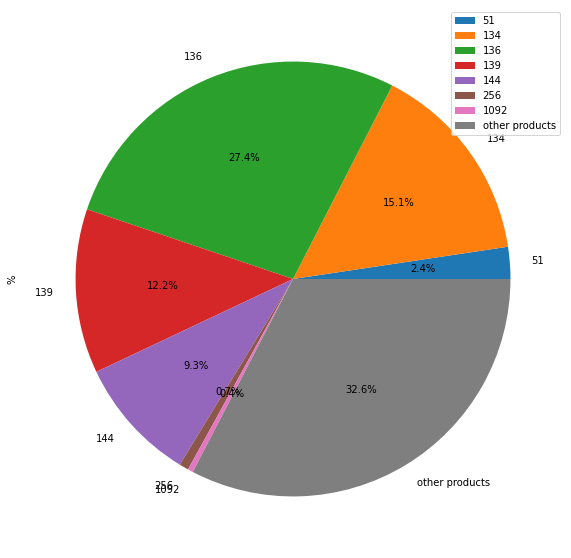

In [1302]:
revenue.groupby(['id']).sum().plot(kind='pie',y='%',figsize=(15,10),autopct='%1.1f%%')

The output was the pie chart above and it comes out a really interesting information that is that the top selling prodcts counts for almost the 70% of the total revenue of the Azienda Ferri. This information is clearly represneted in the pie chart above where the grey areas represent all the products less the top selling one. The other results about the top selling prodcuts are perfectly alliged with the findings of the fist part of this task. 

**Manegerial implication**

Given this results the Azienda Ferri should maybe focous more on the top selling prodcuts and in particular to **id 136** that generates almost the same reveune as all the products without the top selling one. A strategy could be to have less prodcuts since at the moment Azienda Ferri offer 98 diffrents products to their customers and implements the quality of the one that generates more revenue. 

# TASK 6
Proportion of returning customers and one-time purchases

We created a new dataset with customer id and the related purchase frequencies. Then we splitted the frequencies equal to one (one-time purchase) and the frequencies more than 1 (resturining customers).

In [1303]:
freq_C=df_orders['customer_id'].value_counts()
print(freq_C)

CWOE25092516161402PIIA59185751844940NUMD79463182692573    7
JMXX56987278822710KNYX31742308502201XWIA18655131682196    6
HXKP91069862699585YQQT33124609571715JDCW38427136920381    5
YIKN83458319055697RXOW84784885926010VMFY84486686680385    5
ANGA06129440452269BVUC96678542519007XPWW08063359924765    4
                                                         ..
PSFA27932492676175HQOZ86791999289798TXAW24343933976388    1
SGFV34713194281305IVLK96531533606069OZSW66996452305273    1
ANGA06129440452269UCWT72209273743663RGQN54261092796876    1
WTGF40268008382096UVLP28761746037167BODC50672617019811    1
ZFWD37043243603129GEBO22783460826587GWHP63142242434061    1
Name: customer_id, Length: 440, dtype: int64


In [1420]:
returning_c=freq_C==1
returning_c

CWOE25092516161402PIIA59185751844940NUMD79463182692573    False
JMXX56987278822710KNYX31742308502201XWIA18655131682196    False
HXKP91069862699585YQQT33124609571715JDCW38427136920381    False
YIKN83458319055697RXOW84784885926010VMFY84486686680385    False
ANGA06129440452269BVUC96678542519007XPWW08063359924765    False
                                                          ...  
PSFA27932492676175HQOZ86791999289798TXAW24343933976388     True
SGFV34713194281305IVLK96531533606069OZSW66996452305273     True
ANGA06129440452269UCWT72209273743663RGQN54261092796876     True
WTGF40268008382096UVLP28761746037167BODC50672617019811     True
ZFWD37043243603129GEBO22783460826587GWHP63142242434061     True
Name: customer_id, Length: 440, dtype: bool

In [1305]:
freq_P=returning_c.value_counts()
print(freq_P)

True     370
False     70
Name: customer_id, dtype: int64


Having done so, we plotted the results. 


> "true" = one-time purchases(84%),

> "false"= repeated purchases(almost 16%).






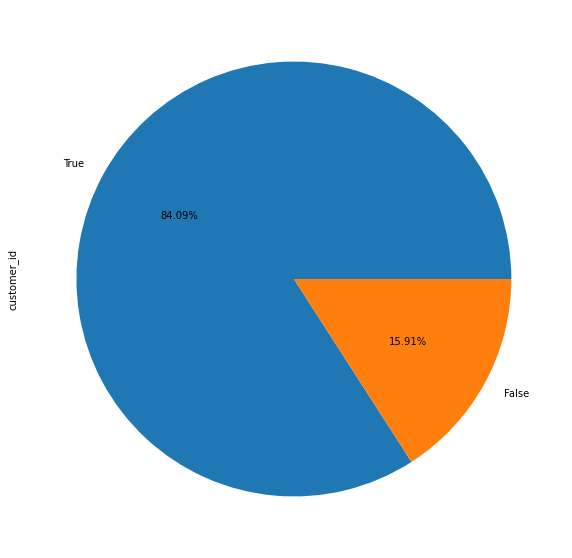

In [1306]:
freq_P.plot.pie(figsize=(15,10),autopct='%1.2f%%')

We have seen that the vast majority is one time customer and only a small percentage are repeted customers. 


# TASK 7
Wine target: age, gender and area

We cannot carry out an analysis for age and gender due to the fact these variables cannot be found in the dataset

We created a unique customer id by putting together first and last name, and email. 

In [1307]:
df_orders['customer_id']=df_orders['Fake_billing.first_name']+df_orders['Fake_billing.last_name']+df_orders['Fake_billing.email']
print(df_orders['customer_id'])

0      ZGAB41269020965501CFWJ54754923773841JMZE871592...
1      ZGAB41269020965501CFWJ54754923773841JMZE871592...
2      CLXE46929852075198CFWJ54754923773841JMZE871592...
3      RFSQ59205400950385JWEA43135901381996EKLC637523...
4      UJVG46347034532271SZJM80282263807089ATSO857429...
                             ...                        
543    IOER69892122222608WCDS85208208851060RLGU915378...
544    JMDY42245565086399PXHZ38624426686618JVIX122502...
545    CWOE25092516161402XZFU09651627229063OXOX723809...
546    HXKP91069862699585YQQT33124609571715JDCW384271...
547    HXKP91069862699585YQQT33124609571715JDCW384271...
Name: customer_id, Length: 548, dtype: object


We created a table displaying the elements of 'line_items' as single columns, highlighting the product_id, name and quantity. 

In [1308]:
df4

,id,meta_data,name,price,product_id,quantity,sku,subtotal,subtotal_tax,tax_class,taxes,total,total_tax,variation_id
0,1731,[],Lattina da 5 Lt di olio extra vergine d’oliva ...,38.50,134,2,001,77.00,0.00,,[],77.00,0.00,0
1,1729,[],Lattina da 5 Lt di olio extra vergine d’oliva ...,38.50,134,2,001,77.00,0.00,,[],77.00,0.00,0
2,1727,[],2 Lattine da 5 Lt di olio extra vergine d’oliv...,77.00,136,1,002,77.00,0.00,,[],77.00,0.00,0
3,1725,[],Lattina da 5 Lt di olio extra vergine d’oliva ...,38.50,134,4,001,154.00,0.00,,[],154.00,0.00,0
4,1720,[],Lattina da 5 Lt di olio extra vergine d’oliva ...,38.50,134,1,001,38.50,0.00,,[],38.50,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,17,[],290 gr Melanzane caserecce sott'olio con olio ...,6.00,265,1,025,6.00,0.00,,[],6.00,0.00,0
544,18,[],Lattina da 3 Lt di olio extra vergine d’oliva ...,18.90,139,1,003,21.00,0.00,,[],18.90,0.00,0
545,13,[],Lattina da 3 Lt di olio extra vergine d’oliva ...,21.00,139,2,003,42.00,0.00,,[],42.00,0.00,0
546,10,[],250 gr Confezione di taralli tradizionali fatt...,0.03,256,1,029,3.00,0.00,,[],0.03,0.00,0


We created a pivot table displaying the total quantity bought by product type, highlighting the best selling product, which in this case is "Lattina da 3 Lt di olio extra vergine d’oliva 100% Italiano", an oil product with 251 units bought. 

In [1309]:
import numpy as np
pivot_orders = pd.pivot_table(df4, values = 'quantity', index=['product_id','name'], aggfunc=np.sum)
pivot_orders = pivot_orders.sort_values('quantity', ascending=False)
pivot_orders

,,quantity
product_id,name,
139,Lattina da 3 Lt di olio extra vergine d’oliva 100% Italiano,251
134,Lattina da 5 Lt di olio extra vergine d’oliva 100% Italiano,182
136,2 Lattine da 5 Lt di olio extra vergine d’oliva 100% Italiano,163
51,1 Lt di olio extra vergine d’oliva 100% italiano,116
1092,Passata di pomodoro casereccia da 580 Gr,93
256,250 gr Confezione di taralli tradizionali fatti con olio extra vergine d'oliva,89
144,6 Bottiglie da 1 Lt di olio extra vergine d’oliva 100% Italiano,83
142,4 Lattine da 3 Lt di olio extra vergine d’oliva 100% Italiano,70
158,Bottiglia da 750 ml di vino bianco D.O.C. Castel del Monte,46


In [1310]:
df_orders

,index,Unnamed: 0.1,id,parent_id,number,order_key,created_via,version,status,currency,date_created,date_created_gmt,date_modified,date_modified_gmt,discount_total,discount_tax,shipping_total,shipping_tax,cart_tax,total,total_tax,prices_include_tax,customer_id,customer_ip_address,customer_user_agent,payment_method,payment_method_title,transaction_id,date_paid,date_paid_gmt,date_completed,date_completed_gmt,cart_hash,meta_data,line_items,tax_lines,shipping_lines,fee_lines,coupon_lines,refunds,billing.city,billing.state,billing.postcode,billing.country,shipping.city,shipping.state,shipping.postcode,shipping.country,_links.self,_links.collection,Fake_billing.first_name,Fake_billing.last_name,Fake_billing.company,Fake_billing.address_1,Fake_billing.address_2,Fake_billing.email,Fake_billing.phone,Fake_shipping.first_name,Fake_shipping.last_name,Fake_shipping.company,Fake_shipping.address_1,Fake_shipping.address_2,oil_buyers
0,0,0,1382,0,1382,wc_order_QcJCLom1HnnKK,checkout,3.8.1,processing,EUR,2021-05-07T07:39:56,2021-05-07T06:39:56,2021-05-07T07:39:56,2021-05-07T06:39:56,0.00,0,0.0,0,0,77.00,0,False,ZGAB41269020965501CFWJ54754923773841JMZE871592...,37.160.44.105,Mozilla/5.0 (Linux; Android 10; Redmi Note 7 B...,cod,Pagamento alla consegna,NaN,NaN,NaN,NaN,NaN,81c91abe1db6de0fb4785fb6b22c3ae3,"[{'id': 37483, 'key': 'mailchimp_woocommerce_c...","[{'id': 1731, 'name': 'Lattina da 5 Lt di olio...",[],"[{'id': 1732, 'method_title': 'Costi di Spediz...",[],[],[],Marcon,VE,30020,IT,Marcon,VE,30020,IT,[{'href': 'http://aziendaagricolaferri.com/wp-...,[{'href': 'http://aziendaagricolaferri.com/wp-...,ZGAB41269020965501,CFWJ54754923773841,UPAS50288279758937,WNNB13043406251041,KSQS07532927514011,JMZE87159295513272,RSQB07488343559075,UGLK17505927119926,NLSX54745286186894,JCKK68309069242447,RXXD87033655860571,AYUI85037015162708,True
1,1,1,1381,0,1381,wc_order_LqraYhI3nCDca,checkout,3.8.1,processing,EUR,2021-05-07T07:37:06,2021-05-07T06:37:06,2021-05-07T07:37:06,2021-05-07T06:37:06,0.00,0,0.0,0,0,77.00,0,False,ZGAB41269020965501CFWJ54754923773841JMZE871592...,37.160.44.105,Mozilla/5.0 (Linux; Android 10; Redmi Note 7 B...,cod,Pagamento alla consegna,NaN,NaN,NaN,NaN,NaN,81c91abe1db6de0fb4785fb6b22c3ae3,"[{'id': 37437, 'key': 'mailchimp_woocommerce_c...","[{'id': 1729, 'name': 'Lattina da 5 Lt di olio...",[],"[{'id': 1730, 'method_title': 'Costi di Spediz...",[],[],[],Marcon,VE,30020,IT,Marcon,VE,30020,IT,[{'href': 'http://aziendaagricolaferri.com/wp-...,[{'href': 'http://aziendaagricolaferri.com/wp-...,ZGAB41269020965501,CFWJ54754923773841,UPAS50288279758937,WNNB13043406251041,KSQS07532927514011,JMZE87159295513272,RSQB07488343559075,UGLK17505927119926,NLSX54745286186894,JCKK68309069242447,RXXD87033655860571,AYUI85037015162708,True
2,2,2,1380,0,1380,wc_order_hnGsEfPWqbMRR,checkout,3.8.1,processing,EUR,2021-05-07T07:29:39,2021-05-07T06:29:39,2021-05-07T07:29:39,2021-05-07T06:29:39,0.00,0,0.0,0,0,77.00,0,False,CLXE46929852075198CFWJ54754923773841JMZE871592...,37.160.44.105,Mozilla/5.0 (Linux; Android 10; Redmi Note 7 B...,cod,Pagamento alla consegna,NaN,NaN,NaN,NaN,NaN,efdebd1e390c3c846d86ff8ec6665f7c,"[{'id': 37391, 'key': 'mailchimp_woocommerce_c...","[{'id': 1727, 'name': '2 Lattine da 5 Lt di ol...",[],"[{'id': 1728, 'method_title': 'Costi di Spediz...",[],[],[],Marcon,VE,30020,IT,Marcon,VE,30020,IT,[{'href': 'http://aziendaagricolaferri.com/wp-...,[{'href': 'http://aziendaagricolaferri.com/wp-...,CLXE46929852075198,CFWJ54754923773841,UPAS50288279758937,PLOF44923047578028,KSQS07532927514011,JMZE87159295513272,KFHM33145864162687,PUCY64999338489058,NLSX54745286186894,JCKK68309069242447,QSSS86803272050501,AYUI85037015162708,True
3,3,3,1379,0,1379,wc_order_Yh8CjHACVb2y0,checkout,3.8.1,processing,EUR,2021-05-06T08:24:18,2021-05-06T07:24:18,2021-05-06T08:26:16,2021-05-06T07:26:16,0.00,0,0.0,0,0,154.00,0,False,RFSQ59205400950385JWEA43135901381996EKLC637523...,77.108.45.226,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,paypal,PayPal,8LH079486T656835U

We merged the table containing the line items elements to the original orders dataset in order to have one row for each product purchased.

In [1311]:
dfmerge = pd.merge(df_orders,df4,
                   left_on='index',
                   right_index=True,
                   how='inner')
dfmerge

,index,Unnamed: 0.1,id_x,parent_id,number,order_key,created_via,version,status,currency,date_created,date_created_gmt,date_modified,date_modified_gmt,discount_total,discount_tax,shipping_total,shipping_tax,cart_tax,total_x,total_tax_x,prices_include_tax,customer_id,customer_ip_address,customer_user_agent,payment_method,payment_method_title,transaction_id,date_paid,date_paid_gmt,date_completed,date_completed_gmt,cart_hash,meta_data_x,line_items,tax_lines,shipping_lines,fee_lines,coupon_lines,refunds,billing.city,billing.state,billing.postcode,billing.country,shipping.city,shipping.state,shipping.postcode,shipping.country,_links.self,_links.collection,Fake_billing.first_name,Fake_billing.last_name,Fake_billing.company,Fake_billing.address_1,Fake_billing.address_2,Fake_billing.email,Fake_billing.phone,Fake_shipping.first_name,Fake_shipping.last_name,Fake_shipping.company,Fake_shipping.address_1,Fake_shipping.address_2,oil_buyers,id_y,meta_data_y,name,price,product_id,quantity,sku,subtotal,subtotal_tax,tax_class,taxes,total_y,total_tax_y,variation_id
0,0,0,1382,0,1382,wc_order_QcJCLom1HnnKK,checkout,3.8.1,processing,EUR,2021-05-07T07:39:56,2021-05-07T06:39:56,2021-05-07T07:39:56,2021-05-07T06:39:56,0.00,0,0.0,0,0,77.00,0,False,ZGAB41269020965501CFWJ54754923773841JMZE871592...,37.160.44.105,Mozilla/5.0 (Linux; Android 10; Redmi Note 7 B...,cod,Pagamento alla consegna,NaN,NaN,NaN,NaN,NaN,81c91abe1db6de0fb4785fb6b22c3ae3,"[{'id': 37483, 'key': 'mailchimp_woocommerce_c...","[{'id': 1731, 'name': 'Lattina da 5 Lt di olio...",[],"[{'id': 1732, 'method_title': 'Costi di Spediz...",[],[],[],Marcon,VE,30020,IT,Marcon,VE,30020,IT,[{'href': 'http://aziendaagricolaferri.com/wp-...,[{'href': 'http://aziendaagricolaferri.com/wp-...,ZGAB41269020965501,CFWJ54754923773841,UPAS50288279758937,WNNB13043406251041,KSQS07532927514011,JMZE87159295513272,RSQB07488343559075,UGLK17505927119926,NLSX54745286186894,JCKK68309069242447,RXXD87033655860571,AYUI85037015162708,True,1731,[],Lattina da 5 Lt di olio extra vergine d’oliva ...,38.50,134,2,001,77.00,0.00,,[],77.00,0.00,0
1,1,1,1381,0,1381,wc_order_LqraYhI3nCDca,checkout,3.8.1,processing,EUR,2021-05-07T07:37:06,2021-05-07T06:37:06,2021-05-07T07:37:06,2021-05-07T06:37:06,0.00,0,0.0,0,0,77.00,0,False,ZGAB41269020965501CFWJ54754923773841JMZE871592...,37.160.44.105,Mozilla/5.0 (Linux; Android 10; Redmi Note 7 B...,cod,Pagamento alla consegna,NaN,NaN,NaN,NaN,NaN,81c91abe1db6de0fb4785fb6b22c3ae3,"[{'id': 37437, 'key': 'mailchimp_woocommerce_c...","[{'id': 1729, 'name': 'Lattina da 5 Lt di olio...",[],"[{'id': 1730, 'method_title': 'Costi di Spediz...",[],[],[],Marcon,VE,30020,IT,Marcon,VE,30020,IT,[{'href': 'http://aziendaagricolaferri.com/wp-...,[{'href': 'http://aziendaagricolaferri.com/wp-...,ZGAB41269020965501,CFWJ54754923773841,UPAS50288279758937,WNNB13043406251041,KSQS07532927514011,JMZE87159295513272,RSQB07488343559075,UGLK17505927119926,NLSX54745286186894,JCKK68309069242447,RXXD87033655860571,AYUI85037015162708,True,1729,[],Lattina da 5 Lt di olio extra vergine d’oliva ...,38.50,134,2,001,77.00,0.00,,[],77.00,0.00,0
2,2,2,1380,0,1380,wc_order_hnGsEfPWqbMRR,checkout,3.8.1,processing,EUR,2021-05-07T07:29:39,2021-05-07T06:29:39,2021-05-07T07:29:39,2021-05-07T06:29:39,0.00,0,0.0,0,0,77.00,0,False,CLXE46929852075198CFWJ54754923773841JMZE871592...,37.160.44.105,Mozilla/5.0 (Linux; Android 10; Redmi Note 7 B...,cod,Pagamento alla consegna,NaN,NaN,NaN,NaN,NaN,efdebd1e390c3c846d86ff8ec6665f7c,"[{'id': 37391, 'key': 'mailchimp_woocommerce_c...","[{'id': 1727, 'name': '2 Lattine da 5 Lt di ol...",[],"[{'id': 1728, 'method_title': 'Costi di Spediz...",[],[],[],Marcon,VE,30020,IT,Marcon,VE,30020,IT,[{'href': 'http://aziendaagricolaferri.com/wp-...,[{'href': 'http://aziendaagricolaferri.com/wp-...,CLXE46929852075198,CFWJ54754923773841,UPAS50288279758937,PLOF44923047578028,KSQS07532927514011,JMZE87159295513272,KFHM33145864162687,PUCY64999338489058,NLSX54745286186894,JCKK68309069242447,QSSS86803272050501,AYUI85037015162

Below a summary table displaying the customer unique id, the name and product id, and the quantity bought.

In [1312]:
dffinal = dfmerge[['customer_id','name','product_id','quantity']]
dffinal

,customer_id,name,product_id,quantity
0,ZGAB41269020965501CFWJ54754923773841JMZE871592...,Lattina da 5 Lt di olio extra vergine d’oliva ...,134,2
1,ZGAB41269020965501CFWJ54754923773841JMZE871592...,Lattina da 5 Lt di olio extra vergine d’oliva ...,134,2
2,CLXE46929852075198CFWJ54754923773841JMZE871592...,2 Lattine da 5 Lt di olio extra vergine d’oliv...,136,1
3,RFSQ59205400950385JWEA43135901381996EKLC637523...,Lattina da 5 Lt di olio extra vergine d’oliva ...,134,4
4,UJVG46347034532271SZJM80282263807089ATSO857429...,Lattina da 5 Lt di olio extra vergine d’oliva ...,134,1
...,...,...,...,...
544,JMDY42245565086399PXHZ38624426686618JVIX122502...,290 gr Melanzane caserecce sott'olio con olio ...,265,1
544,JMDY42245565086399PXHZ38624426686618JVIX122502...,Lattina da 3 Lt di olio extra vergine d’oliva ...,139,1
545,CWOE25092516161402XZFU09651627229063OXOX723809...,Lattina da 3 Lt di olio extra vergine d’oliva ...,139,2
546,HXKP91069862699585YQQT33124609571715JDCW384271...,250 gr Confezione di taralli tradizionali fatt...,256,1


we then identified which of the orders are wine orders(True) and counted how many there were

In [1313]:
searchwine=['D.O.C.','Magnum']
dfmerge['winetarget']=dfmerge['name'].apply(lambda x: True if any(i in x for i in searchwine) else False)
print(dfmerge['winetarget'])

0      False
1      False
2      False
3      False
4      False
       ...  
544    False
544    False
545    False
546    False
547     True
Name: winetarget, Length: 1026, dtype: bool


In [1314]:
dfmerge['winetarget'].value_counts()

False    853
True     173
Name: winetarget, dtype: int64

Subsequently, we divided the orders by province and then represented in a new table only the ones related to wine(True).

In [1315]:
dfmerge["shipping.state"].value_counts()

TO    104
NA     91
RM     82
MI     71
VI     56
     ... 
IS      1
LU      1
BI      1
BZ      1
PC      1
Name: shipping.state, Length: 73, dtype: int64

In [1316]:
wine_province=dfmerge[['shipping.state','winetarget']]
print(wine_province)

    shipping.state  winetarget
0               VE       False
1               VE       False
2               VE       False
3               AT       False
4               PR       False
..             ...         ...
544             FE       False
544             FE       False
545             RM       False
546             AP       False
547             AP        True

[1026 rows x 2 columns]


In [1317]:
a=[False]
wine_province=wine_province[~wine_province["winetarget"].isin(a)]
print(wine_province)

    shipping.state  winetarget
11              TO        True
11              TO        True
16              MI        True
42              MI        True
48              VI        True
..             ...         ...
533             VA        True
535             MI        True
544             FE        True
544             FE        True
547             AP        True

[173 rows x 2 columns]


The frequency of wine buyers by province was computed 

In [1318]:
freq=wine_province['shipping.state'].value_counts()
print(freq)
print(sum(freq))

TO    28
NA    19
MI    12
PD     8
RM     7
PR     6
SP     6
MC     5
TV     4
TN     4
GE     4
FE     4
BO     4
VA     3
SO     3
RA     3
FI     3
CN     3
MB     3
AL     3
PV     3
CO     3
AN     3
PN     3
LT     3
SA     2
AO     2
PZ     2
LO     2
ME     2
UD     2
BS     2
RE     2
MO     1
RO     1
AP     1
VI     1
VC     1
NO     1
LC     1
MS     1
BG     1
AT     1
Name: shipping.state, dtype: int64
173


We can immediately notice that the two cities with most wine purchases are Turin and Naples, with a frequency of respectively 29 and 19. 
At this moment, we divided the provinces into 5 main areas: North-West, North-East, Centre, South and Islands. 

In [1319]:
list_nordovest=["GE","IM","SP","SV","BG","BS","CO","CR","LC","LO","MN","MI","MB","PV","SO","VA","AL","AT","BI","CN","NO","TO","VB","VC","AO"]
list_nordest=["BO","FE","FC","MO","PR","PC","RA","RE","RN","GO","PN","TS","UD","BZ","TN","BL","PD","RO","TV","VE","VR","VI"]
list_centro=["FR","LT","RI","RM","VT","AN","AP","FM","MC","PU","AR","FI","GR",'LI',"LU","MS","PI","PT","PO","SI", "PG","TR","RM"]
list_sud=["AQ","CZ","CH","CS","KR","PE","RC","TE","MT","PZ","VV","AV","BN","CE","NA","SA","CB","IS","BA","BT","BR","FG","LE","TA"]
list_isole= ["AG","CA","CL","CI","CT","EN","VS","ME","NU","OG","OT","OR","PA","RG","SS","SR","TP","CT","EN","VS","ME","NU","OG","OT","OR","PA","RG","SS","SR","TP"]

Afterwards, we looked at which provinces from the wine purchases list were contained in the areas, creating new lists of wine purchases by area. 

In [1320]:
isole=wine_province[wine_province['shipping.state'].isin(list_isole)]
print(isole)

    shipping.state  winetarget
211             ME        True
211             ME        True


In [1321]:
nordovest=wine_province[wine_province['shipping.state'].isin(list_nordovest)]
print(nordovest)

    shipping.state  winetarget
11              TO        True
11              TO        True
16              MI        True
42              MI        True
59              VC        True
..             ...         ...
487             AT        True
533             VA        True
533             VA        True
533             VA        True
535             MI        True

[82 rows x 2 columns]


In [1322]:
nordest=wine_province[wine_province['shipping.state'].isin(list_nordest)]
print(nordest)

    shipping.state  winetarget
48              VI        True
65              PR        True
65              PR        True
65              PR        True
111             FE        True
111             FE        True
174             TN        True
205             UD        True
239             BO        True
239             BO        True
260             PD        True
260             PD        True
260             PD        True
261             PD        True
261             PD        True
261             PD        True
276             RO        True
281             RA        True
283             RA        True
303             PR        True
303             PR        True
303             PR        True
326             RE        True
326             RE        True
327             TN        True
327             TN        True
336             RA        True
351             TN        True
354             PN        True
354             PN        True
373             MO        True
382     

In [1323]:
sud=wine_province[wine_province['shipping.state'].isin(list_sud)]
print(sud)

    shipping.state  winetarget
138             PZ        True
187             NA        True
187             NA        True
187             NA        True
301             NA        True
301             NA        True
324             NA        True
324             NA        True
353             SA        True
353             SA        True
358             NA        True
383             NA        True
396             PZ        True
402             NA        True
422             NA        True
422             NA        True
426             NA        True
426             NA        True
455             NA        True
455             NA        True
504             NA        True
504             NA        True
504             NA        True


In [1324]:
centro=wine_province[wine_province['shipping.state'].isin(list_centro)]
print(centro)

    shipping.state  winetarget
54              RM        True
54              RM        True
168             MS        True
271             MC        True
271             MC        True
271             MC        True
278             LT        True
299             MC        True
299             MC        True
325             FI        True
325             FI        True
328             RM        True
328             RM        True
331             FI        True
398             LT        True
414             RM        True
414             RM        True
418             AN        True
450             LT        True
501             RM        True
532             AN        True
532             AN        True
547             AP        True


In [1325]:
freqcentro=wine_province[wine_province['shipping.state'].isin(list_centro)].value_counts('shipping.state')
print(freqcentro)
sum_centro=(sum(freqcentro))
sum_centro

shipping.state
RM    7
MC    5
LT    3
FI    3
AN    3
MS    1
AP    1
dtype: int64


23

In [1326]:
freqnordest=wine_province[wine_province['shipping.state'].isin(list_nordest)].value_counts('shipping.state')
print(freqnordest)
sum_nordest=(sum(freqnordest))
sum_nordest

shipping.state
PD    8
PR    6
TV    4
TN    4
FE    4
BO    4
RA    3
PN    3
UD    2
RE    2
VI    1
RO    1
MO    1
dtype: int64


43

In [1327]:
freqnordovest=wine_province[wine_province['shipping.state'].isin(list_nordovest)].value_counts('shipping.state')
print(freqnordovest)
sum_nordovest=(sum(freqnordovest))
sum_nordovest

shipping.state
TO    28
MI    12
SP     6
GE     4
AL     3
CN     3
SO     3
PV     3
MB     3
VA     3
CO     3
AO     2
BS     2
LO     2
LC     1
BG     1
AT     1
NO     1
VC     1
dtype: int64


82

In [1328]:
freqsud=wine_province[wine_province['shipping.state'].isin(list_sud)].value_counts('shipping.state')
print(freqsud)
sum_sud=sum(freqsud)
sum_sud

shipping.state
NA    19
SA     2
PZ     2
dtype: int64


23

In [1329]:
freqisole=wine_province[wine_province['shipping.state'].isin(list_isole)].value_counts('shipping.state')
print(freqisole)
sum_isole=sum(freqisole)

shipping.state
ME    2
dtype: int64


By looking at the sum of the frequencies of the areas, we can immediately notice that the North-Western area is the first in Italy for wine purchases.
Followed by North-East, Centre and South. 
The Islands only present two purchases from Messina. 

To better represent these data, we plotted them on bar charts. First, we represented all the provinces together, then we divided them by area. 

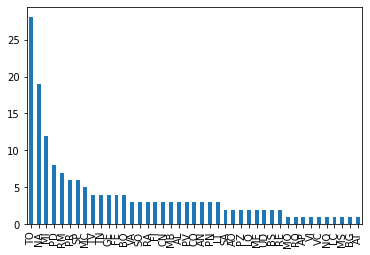

In [1330]:
import matplotlib.pyplot as plt
freq.plot.bar()

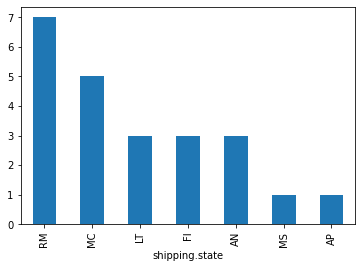

In [1331]:
freqcentro.plot.bar()

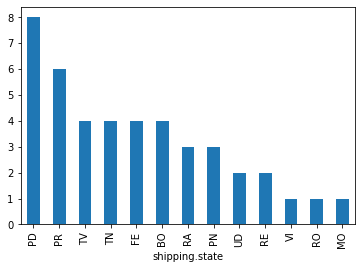

In [1332]:
freqnordest.plot.bar()

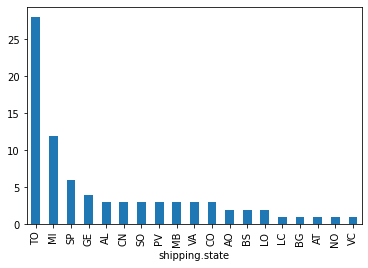

In [1333]:
freqnordovest.plot.bar()

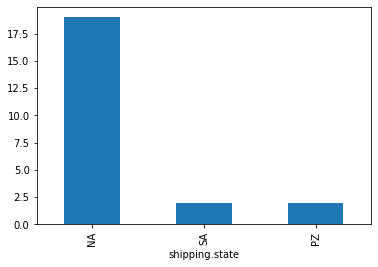

In [1334]:
freqsud.plot.bar()

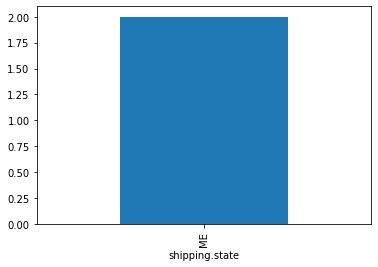

In [1335]:
freqisole.plot.bar()

In [1336]:
wine_area={'Area': ['Nord est','Nord ovest','Centro','Sud','Isole'],'Freq_A':[sum_nordest,sum_nordovest,sum_centro,sum_sud,sum_isole]}
df_area=pd.DataFrame(wine_area,columns=['Area','Freq_A'])
print(df_area)

         Area  Freq_A
0    Nord est      43
1  Nord ovest      82
2      Centro      23
3         Sud      23
4       Isole       2


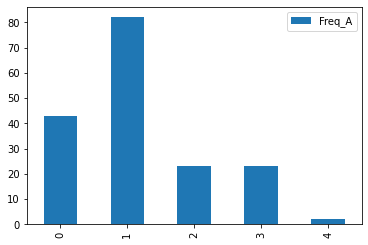

In [1337]:
df_area.plot.bar()

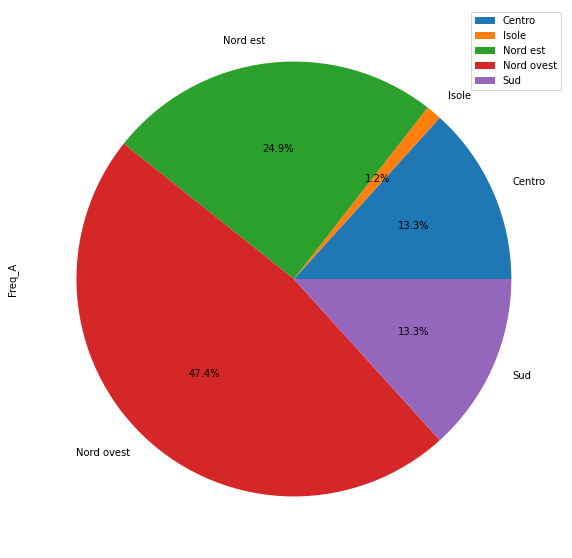

In [1338]:
df_area.groupby(['Area']).sum().plot(kind='pie',y='Freq_A',figsize=(15,10),autopct='%1.1f%%')

From the graphs, we can further deduce that the 47,4% of wine purchases comes from the North-West area, in particular from the cities of Turin and Milan.  The North-East follows suit with 24,9%, the Centre and South areas with 13,3%. It must be noted that the wine purchases from the Centre area are concentrated in the capital city of Rome. While the Southern area purchases are concentrated in the area of Naples, the second biggest city for wine purchases overall. 

Lastly, the purchases of wine register the lowest percentage(1,2%) in the islands, with just two purchases coming from Messina. 

# TASK 8
What are the most highly correlated products connected to preserves purchases

In [1339]:
pivot_orders

,,quantity
product_id,name,
139,Lattina da 3 Lt di olio extra vergine d’oliva 100% Italiano,251
134,Lattina da 5 Lt di olio extra vergine d’oliva 100% Italiano,182
136,2 Lattine da 5 Lt di olio extra vergine d’oliva 100% Italiano,163
51,1 Lt di olio extra vergine d’oliva 100% italiano,116
1092,Passata di pomodoro casereccia da 580 Gr,93
256,250 gr Confezione di taralli tradizionali fatti con olio extra vergine d'oliva,89
144,6 Bottiglie da 1 Lt di olio extra vergine d’oliva 100% Italiano,83
142,4 Lattine da 3 Lt di olio extra vergine d’oliva 100% Italiano,70
158,Bottiglia da 750 ml di vino bianco D.O.C. Castel del Monte,46


In [1340]:
dffinal

,customer_id,name,product_id,quantity
0,ZGAB41269020965501CFWJ54754923773841JMZE871592...,Lattina da 5 Lt di olio extra vergine d’oliva ...,134,2
1,ZGAB41269020965501CFWJ54754923773841JMZE871592...,Lattina da 5 Lt di olio extra vergine d’oliva ...,134,2
2,CLXE46929852075198CFWJ54754923773841JMZE871592...,2 Lattine da 5 Lt di olio extra vergine d’oliv...,136,1
3,RFSQ59205400950385JWEA43135901381996EKLC637523...,Lattina da 5 Lt di olio extra vergine d’oliva ...,134,4
4,UJVG46347034532271SZJM80282263807089ATSO857429...,Lattina da 5 Lt di olio extra vergine d’oliva ...,134,1
...,...,...,...,...
544,JMDY42245565086399PXHZ38624426686618JVIX122502...,290 gr Melanzane caserecce sott'olio con olio ...,265,1
544,JMDY42245565086399PXHZ38624426686618JVIX122502...,Lattina da 3 Lt di olio extra vergine d’oliva ...,139,1
545,CWOE25092516161402XZFU09651627229063OXOX723809...,Lattina da 3 Lt di olio extra vergine d’oliva ...,139,2
546,HXKP91069862699585YQQT33124609571715JDCW384271...,250 gr Confezione di taralli tradizionali fatt...,256,1


We created a new pivot table, displaying the quantities of product purchased by a single customer.

In [1341]:
pivot = dffinal.pivot_table(index='name',columns='customer_id',values='quantity',aggfunc='sum')
pivot=pivot.applymap(lambda x:x if x>0 else 0)
pivot

customer_id,AHKP86865559996979SSUR16131560965363DUJK42633714283702,AHQP89465822413203QCEQ21696229013418FKUD66758461993493,AJWY63902597030875AEMQ03960364557788VXNJ20332325508065,ANGA06129440452269BVUC96678542519007XPWW08063359924765,ANGA06129440452269BZRB46247082525571TJPH13343560789755,ANGA06129440452269FUYX73198934436444HXNR33139950986905,ANGA06129440452269IPGC43079013605614HCDR97643405272549,ANGA06129440452269SMVE92546077864675ICMH96452717787863,ANGA06129440452269UCWT72209273743663RGQN54261092796876,AQLG63353163008623WDGF59618624127525HVJR34664314662370,AQLG63353163008623WHLO77777464336607WJLG07519786833174,AQLG63353163008623WQSU06672680099067KRVJ17426823634447,AUNT67311907164381VVPJ15787433289237CJPH11454665031018,AVDS65513679727134ADCQ34604779771371WFXP12433510746640,AVDS65513679727134CJBE61495532856474BXLS21469788930935,AVDS65513679727134CUOC21606464206784WHFD46493720296823,AVDS65513679727134JTDT60412387880274OBXO13178778720510,AVDS65513679727134KHOL63641697850358ALYV50098784884426,AVDS65513679727134KJHL89628588157592EUJO22828565180164,AVDS65513679727134KMWH64462795232337TDMI75077161440803,AVDS65513679727134QWYN04281940722380VIOU78282724781746,AVPX10407571274319EAQH40328181722633GFOT58628048143953,AVPX10407571274319FVJD62088530418200GUAH91032683814761,AVPX10407571274319KHOL63641697850358RLFA51622613730669,AVVB34471443575737QWSP39019412031158KEGH76181947021849,AVVB34471443575737RGSX18752193726320FOAC59767030606829,AVVB34471443575737RLCJ06701044028678JTIV08333294638913,AVVB34471443575737TFXX21644135252756NIYM64162229458414,AVVB34471443575737WKFM84010592392743AUHQ03278915401614,AWMI60652975556580RFOD73299367893067KSRE57443447945037,AXZC12535156833557DZCB63896375443797SPJR27448304152830,AXZC12535156833557TOKK91442287839096PIWB06162536258686,BAYL45312278894028GXTG66380553779690XSJE64391313842979,BAYL45312278894028ZBHT48680296195859SZNT27870283974421,BEZI87504107765154IFXG16021795075458LHOS46148870280452,BISF09973641236511IFXT80353974938768QUDU30245916862548,BISF09973641236511ZAPC46875239632289TQFX59400989171598,BKEQ34310992377272HPFU99060758406624AVQM11907044148569,BQQM41818337339890CQXP54512095240768CAKV32679179319397,BQQM41818337339890IVAF84698114424806NOKS62320757360729,...,XDAP93549976099086VFDV75124287603891FPEF73668042691827,XECL67714391882849RATW80373918985331OCKG24736187673650,XGDA91886732721082OVII29576259700223DTDG58546039163102,XGQL79911889949617ALXY71926952756756XQUI26492185544123,XGQL79911889949617ZEOX16582082994140VLIV21919850521707,XGQL79911889949617ZKLZ68023646178006ACRG04062717215302,XGQL79911889949617ZKLZ68023646178006COYS79692318624595,XHHG07036319925344YNRE66566641937209JSTJ98271264385362,XLPT37706130149001HMVZ35523274355217ADQY54174998278139,XXFB04296284194905ZMDQ54962589724027AQJT23520120995062,XZTJ15234449867332KMAA61182040076167ELQY06389598654123,XZTJ15234449867332KMAA61182040076167ZACQ08856128714285,YECY00202862612112QVBW67269979145293TQFX59400989171598,YIKN83458319055697PERH94605248372152VMFY84486686680385,YIKN83458319055697RXOW84784885926010VMFY84486686680385,YIKN83458319055697VMZV74524621787517DXQP86533840947899,YIKN83458319055697WFVX13675950405270WARH82372792915181,YJWB40971669320192VFZE41900769441365PCGF16977778934670,YJWB40971669320192VFZE41900769441365YWKA92659207489015,YKTN39606835841085GBAM86353679966188NCUK69425476647318,YKTN39606835841085JFKJ74090291646709TBWS10794761096403,YMAD21812024734050ZCKL12112929324432SGSU88746543099298,YNMT62961359068833SFYU65595566615250OGEY32722942811024,YOVW56884955967661YGTA90700265886319SFDH92334825067788,YQHM66425016112036PYEE42724652299520MFNL16275365457943,YSOU34654192614892BEMT99525106905161FRVX97400681238575,YSOU34654192614892FGTK92543346971017LXQF23989093031555,ZCIK73059972568366OKVG19966694692847DDJF96473674475637,ZCIK73059972568366ZLND74416576969980AGGB13814351242396,ZFWD37043243603129GEBO22783460826587GWHP63142242434061,ZGAB41269020965501CFWJ54754923773841JMZE87159295513272,ZHYH57224268143618EXSB05135470407544FRWW53436718331827,ZHYH57224268143618UYEX74

By using the cosine similarity we computed the correlation between products and printed the four most relevant correlations with the preserves products.

In [1342]:
from sklearn.metrics.pairwise import cosine_similarity

ML = pd.DataFrame(cosine_similarity(pivot))
ML.columns = pivot.index
ML['name'] = pivot.index
ML = ML.set_index('name')
ML1 = ML["290 gr Carciofini sott'olio con olio extra vergine d'oliva"].sort_values(ascending=False)[1:5]
ML2 = ML["359 gr Pomodori secchi sott'olio con olio extra vergine d'oliva"].sort_values(ascending=False)[1:5]
ML3 = ML["290 gr Melanzane caserecce sott'olio con olio extra vergine d'oliva"].sort_values(ascending=False)[1:5]
ML4 = ML['359 gr Olive nere condite in olio extra vergine di oliva'].sort_values(ascending=False)[1:5]
ML5 = ML["290 gr Funghi cardoncelli sott'olio con olio extra vergine d'oliva"].sort_values(ascending=False)[1:5]
ML6 = ML['359 gr Cime di Rapa in olio extra vergine di oliva'].sort_values(ascending=False)[1:5]
ML7 = ML["359 gr Peperoni alla brace sott'olio con olio extra vergine d'oliva"].sort_values(ascending=False)[1:5]
ML8 = ML['290 gr Olive verdi bella di Cerignola in salamoia'].sort_values(ascending=False)[1:5]
ML9 = ML["359 gr Melanzane a filetti sott'olio con olio extra vergine d'oliva"].sort_values(ascending=False)[1:5]
ML10 = ML["290 gr Peperoncini ripieni sott'olio con olio extra vergine d'oliva"].sort_values(ascending=False)[1:5]
ML11 = ML["290 gr Pomodori secchi sott'olio con olio extra vergine d'oliva"].sort_values(ascending=False)[1:5]
ML12 = ML['359 gr Olive verdi bella di Cerignola in salamoia'].sort_values(ascending=False)[1:5]
ML13 = ML["359 gr Peperoncini piccanti ripieni sott'olio con olio extra vergine d'oliva"].sort_values(ascending=False)[1:5]
ML14 = ML['290 gr Cime di Rapa in olio extra vergine di oliva'].sort_values(ascending=False)[1:5]
ML15 = ML["359 gr Involtini di Melanzane sott’olio con olio extra vergine d’oliva"].sort_values(ascending=False)[1:5]
ML16 = ML['359 gr Cipolline grigliate in olio extra vergine di oliva'].sort_values(ascending=False)[1:5]
ML17 = ML["359 gr Lampascioni sott’olio con olio extra vergine d’oliva"].sort_values(ascending=False)[1:5]
ML18 = ML["359 gr Zucchine alla brace sott'olio con olio extra vergine d'oliva"].sort_values(ascending=False)[1:5]
ML19 = ML["359 gr Melanzane caserecce sott'olio con olio extra vergine d'oliva"].sort_values(ascending=False)[1:5]
ML20 = ML['359 gr Funghi pleurotus in olio extra vergine di oliva'].sort_values(ascending=False)[1:5]
ML21 = ML["359 gr Involtini di zucchine sott'olio con olio extra vergine d'oliva"].sort_values(ascending=False)[1:5]
ML22 = ML["Valigetta con 6 vasetti da 290 gr di misto sott'olio con olio extra vergine di oliva"].sort_values(ascending=False)[1:5]
ML23 = ML["Valigetta con 3 vasetti da 290 gr di misto sott’olio con olio extra vergine di oliva"].sort_values(ascending=False)[1:5]
ML24 = ML['Passata di pomodoro casereccia da 580 Gr'].sort_values(ascending=False)[1:5] 

In [1343]:
print(ML1)

name
359 gr Cipolline grigliate in olio extra vergine di oliva                       0.377742
290 gr Melanzane caserecce sott'olio con olio extra vergine d'oliva             0.304776
290 gr Olive verdi bella di Cerignola in salamoia                               0.240381
359 gr Peperoncini piccanti ripieni sott'olio con olio extra vergine d'oliva    0.220267
Name: 290 gr Carciofini sott'olio con olio extra vergine d'oliva, dtype: float64


In [1344]:
print(ML2)

name
359 gr Olive verdi bella di Cerignola in salamoia                      0.458831
359 gr Olive nere condite in olio extra vergine di oliva               0.414578
359 gr Melanzane caserecce sott'olio con olio extra vergine d'oliva    0.381356
359 gr Cime di Rapa in olio extra vergine di oliva                     0.343122
Name: 359 gr Pomodori secchi sott'olio con olio extra vergine d'oliva, dtype: float64


In [1345]:
print(ML3)

name
290 gr Cime di Rapa in olio extra vergine di oliva                                        0.651182
Bottiglia da 250 ml con tappo antirabbocco di olio extra vergine d'oliva 100% Italiano    0.392232
290 gr Pomodori secchi sott'olio con olio extra vergine d'oliva                           0.336336
290 gr Carciofini sott'olio con olio extra vergine d'oliva                                0.304776
Name: 290 gr Melanzane caserecce sott'olio con olio extra vergine d'oliva, dtype: float64


In [1346]:
print(ML4)

name
359 gr Peperoncini piccanti ripieni sott'olio con olio extra vergine d'oliva      0.443203
250 gr Confezione di taralli tradizionali fatti con olio extra vergine d'oliva    0.441851
359 gr Pomodori secchi sott'olio con olio extra vergine d'oliva                   0.414578
Bottiglia da 750 ml di vino rosso D.O.C. Castel del Monte                         0.351840
Name: 359 gr Olive nere condite in olio extra vergine di oliva, dtype: float64


In [1347]:
print(ML5)

name
Valigetta con 3 vasetti da 290 gr di misto sott’olio con olio extra vergine di oliva    0.771517
Valigetta con assaggi assortiti (2 confezioni di conserve, olio, vino rosato)           0.690066
359 gr Involtini di zucchine sott'olio con olio extra vergine d'oliva                   0.629941
Bottiglia da 500ml di Rosolio alle foglie di ulivo                                      0.356348
Name: 290 gr Funghi cardoncelli sott'olio con olio extra vergine d'oliva, dtype: float64


In [1348]:
print(ML6)

name
359 gr Melanzane caserecce sott'olio con olio extra vergine d'oliva                     0.803614
Valigetta con 6 vasetti da 290 gr di misto sott'olio con olio extra vergine di oliva    0.440225
359 gr Melanzane a filetti sott'olio con olio extra vergine d'oliva                     0.419371
359 gr Pomodori secchi sott'olio con olio extra vergine d'oliva                         0.343122
Name: 359 gr Cime di Rapa in olio extra vergine di oliva, dtype: float64


In [1349]:
print(ML7)

name
359 gr Zucchine alla brace sott'olio con olio extra vergine d'oliva       0.549972
359 gr Involtini di Melanzane sott’olio con olio extra vergine d’oliva    0.471405
359 gr Melanzane a filetti sott'olio con olio extra vergine d'oliva       0.412479
359 gr Olive verdi bella di Cerignola in salamoia                         0.378517
Name: 359 gr Peperoni alla brace sott'olio con olio extra vergine d'oliva, dtype: float64


In [1350]:
print(ML8)

name
290 gr Melanzane caserecce sott'olio con olio extra vergine d'oliva       0.277350
359 gr Zucchine alla brace sott'olio con olio extra vergine d'oliva       0.250000
359 gr Involtini di Melanzane sott’olio con olio extra vergine d’oliva    0.250000
290 gr Carciofini sott'olio con olio extra vergine d'oliva                0.240381
Name: 290 gr Olive verdi bella di Cerignola in salamoia, dtype: float64


In [1351]:
print(ML9)

name
359 gr Melanzane caserecce sott'olio con olio extra vergine d'oliva                     0.485363
359 gr Cime di Rapa in olio extra vergine di oliva                                      0.419371
359 gr Peperoni alla brace sott'olio con olio extra vergine d'oliva                     0.412479
Valigetta con 6 vasetti da 290 gr di misto sott'olio con olio extra vergine di oliva    0.288675
Name: 359 gr Melanzane a filetti sott'olio con olio extra vergine d'oliva, dtype: float64


In [1352]:
print(ML10)

name
290 gr Melanzane caserecce sott'olio con olio extra vergine d'oliva                       0.208013
290 gr Pomodori secchi sott'olio con olio extra vergine d'oliva                           0.181902
Bottiglia da 250 ml con tappo antirabbocco di olio extra vergine d'oliva 100% Italiano    0.176777
Valigetta con 3 bottiglie da 750 ml di vino rosso D.O.C. Castel del Monte                 0.176777
Name: 290 gr Peperoncini ripieni sott'olio con olio extra vergine d'oliva, dtype: float64


In [1353]:
print(ML11)

name
Bottiglia da 250 ml con tappo antirabbocco di olio extra vergine d'oliva 100% Italiano    0.342997
290 gr Melanzane caserecce sott'olio con olio extra vergine d'oliva                       0.336336
290 gr Cime di Rapa in olio extra vergine di oliva                                        0.325396
Lattina da 3 Lt di olio extra vergine d’oliva 100% Italiano                               0.295547
Name: 290 gr Pomodori secchi sott'olio con olio extra vergine d'oliva, dtype: float64


In [1354]:
print(ML12)

name
359 gr Pomodori secchi sott'olio con olio extra vergine d'oliva        0.458831
359 gr Zucchine alla brace sott'olio con olio extra vergine d'oliva    0.458831
290 gr Carciofi grigliati sott'olio con olio extra vergine d'oliva     0.418143
359 gr Peperoni alla brace sott'olio con olio extra vergine d'oliva    0.378517
Name: 359 gr Olive verdi bella di Cerignola in salamoia, dtype: float64


In [1355]:
print(ML13)

name
359 gr Olive nere condite in olio extra vergine di oliva               0.443203
359 gr Melanzane caserecce sott'olio con olio extra vergine d'oliva    0.222375
290 gr Carciofini sott'olio con olio extra vergine d'oliva             0.220267
359 gr Peperoni alla brace sott'olio con olio extra vergine d'oliva    0.188982
Name: 359 gr Peperoncini piccanti ripieni sott'olio con olio extra vergine d'oliva, dtype: float64


In [1356]:
print(ML14)

name
290 gr Melanzane caserecce sott'olio con olio extra vergine d'oliva                       0.651182
290 gr Pomodori secchi sott'olio con olio extra vergine d'oliva                           0.325396
Bottiglia da 250 ml con tappo antirabbocco di olio extra vergine d'oliva 100% Italiano    0.316228
290 gr Carciofi grigliati sott'olio con olio extra vergine d'oliva                        0.291111
Name: 290 gr Cime di Rapa in olio extra vergine di oliva, dtype: float64


In [1357]:
print(ML15)

name
359 gr Involtini di zucchine sott'olio con olio extra vergine d'oliva                   0.544331
359 gr Peperoni alla brace sott'olio con olio extra vergine d'oliva                     0.471405
Valigetta con 3 vasetti da 290 gr di misto sott’olio con olio extra vergine di oliva    0.333333
359 gr Zucchine alla brace sott'olio con olio extra vergine d'oliva                     0.333333
Name: 359 gr Involtini di Melanzane sott’olio con olio extra vergine d’oliva, dtype: float64


In [1358]:
print(ML16)

name
290 gr Carciofi grigliati sott'olio con olio extra vergine d'oliva     0.455661
290 gr Carciofini sott'olio con olio extra vergine d'oliva             0.377742
359 gr Olive verdi bella di Cerignola in salamoia                      0.344124
359 gr Peperoni alla brace sott'olio con olio extra vergine d'oliva    0.235702
Name: 359 gr Cipolline grigliate in olio extra vergine di oliva, dtype: float64


In [1359]:
print(ML17)

name
359 gr Funghi pleurotus in olio extra vergine di oliva                            0.344265
359 gr Olive nere condite in olio extra vergine di oliva                          0.311400
250 gr Confezione di taralli tradizionali fatti con olio extra vergine d'oliva    0.285569
BOX "Pacco Dalla Puglia"                                                          0.182574
Name: 359 gr Lampascioni sott’olio con olio extra vergine d’oliva, dtype: float64


In [1360]:
print(ML18)

name
359 gr Peperoni alla brace sott'olio con olio extra vergine d'oliva       0.549972
359 gr Olive verdi bella di Cerignola in salamoia                         0.458831
359 gr Involtini di Melanzane sott’olio con olio extra vergine d’oliva    0.333333
359 gr Involtini di zucchine sott'olio con olio extra vergine d'oliva     0.272166
Name: 359 gr Zucchine alla brace sott'olio con olio extra vergine d'oliva, dtype: float64


In [1361]:
print(ML19)

name
359 gr Cime di Rapa in olio extra vergine di oliva                                      0.803614
359 gr Melanzane a filetti sott'olio con olio extra vergine d'oliva                     0.485363
Valigetta con 6 vasetti da 290 gr di misto sott'olio con olio extra vergine di oliva    0.480384
359 gr Pomodori secchi sott'olio con olio extra vergine d'oliva                         0.381356
Name: 359 gr Melanzane caserecce sott'olio con olio extra vergine d'oliva, dtype: float64


In [1362]:
print(ML20)

name
250 gr Confezione di taralli tradizionali fatti con olio extra vergine d'oliva        0.405534
Valigetta con assaggi assortiti (2 confezioni di olive in salamoia, olio, taralli)    0.384900
359 gr Lampascioni sott’olio con olio extra vergine d’oliva                           0.344265
359 gr Olive nere condite in olio extra vergine di oliva                              0.251259
Name: 359 gr Funghi pleurotus in olio extra vergine di oliva, dtype: float64


In [1363]:
print(ML21)

name
Valigetta con 3 vasetti da 290 gr di misto sott’olio con olio extra vergine di oliva    0.816497
Valigetta con assaggi assortiti (2 confezioni di conserve, olio, vino rosato)           0.730297
290 gr Funghi cardoncelli sott'olio con olio extra vergine d'oliva                      0.629941
359 gr Involtini di Melanzane sott’olio con olio extra vergine d’oliva                  0.544331
Name: 359 gr Involtini di zucchine sott'olio con olio extra vergine d'oliva, dtype: float64


In [1364]:
print(ML22)

name
359 gr Melanzane caserecce sott'olio con olio extra vergine d'oliva        0.480384
359 gr Cime di Rapa in olio extra vergine di oliva                         0.440225
359 gr Melanzane a filetti sott'olio con olio extra vergine d'oliva        0.288675
Valigetta con 3 bottiglie da 750 ml di vino D.O.C. Castel del Monte MIX    0.258199
Name: Valigetta con 6 vasetti da 290 gr di misto sott'olio con olio extra vergine di oliva, dtype: float64


In [1365]:
print(ML23)

name
Valigetta con assaggi assortiti (2 confezioni di conserve, olio, vino rosato)    0.894427
359 gr Involtini di zucchine sott'olio con olio extra vergine d'oliva            0.816497
290 gr Funghi cardoncelli sott'olio con olio extra vergine d'oliva               0.771517
359 gr Involtini di Melanzane sott’olio con olio extra vergine d’oliva           0.333333
Name: Valigetta con 3 vasetti da 290 gr di misto sott’olio con olio extra vergine di oliva, dtype: float64


Through this analysis we can conclude that the products that correlate with preserves the most are the two types of valigetta, containing respectively a mixture of preserves products and assorted flavours. 

It must be noted that the product "Pomodori secchi sott'olio con olio extra vergine d'oliva" presents the highest correlation with an oil product, differentiating itself from the other preserves products which are mostly correlated to other preserves products. 

# TASK 9
Cart composition frequencies (number of items and categories)

First, we highlighted the number of purchases carried out by each customer.

In [1366]:
dfmerge['customer_id'].value_counts() 

CWOE25092516161402PIIA59185751844940NUMD79463182692573    27
CWOE25092516161402XZFU09651627229063OXOX72380951493537    20
AVVB34471443575737RGSX18752193726320FOAC59767030606829    20
UUDE75727624700947TWGG88645023754634XIHA32874548580586    14
HQGT41971702902033FXHV95601010729826KUEQ64710700292728    14
                                                          ..
TQCP27371230902918PZDT34375669318435RNMH27958477727602     1
TAMR56223575673505LWKM23509066701878PQPS07412499109373     1
IOJA64376382329833PRGG85478790892583QIJS98043685589535     1
XECL67714391882849RATW80373918985331OCKG24736187673650     1
ZFWD37043243603129GEBO22783460826587GWHP63142242434061     1
Name: customer_id, Length: 440, dtype: int64

we identified the number of orders by product category: wine, oil, preserves and other.  

In [1367]:
searchwine=['D.O.C.','Magnum']
dfmerge['winepurchase']=dfmerge['name'].apply(lambda x: True if any(i in x for i in searchwine)else False)
wineprod=dfmerge['winepurchase'].value_counts()
wineprod

False    853
True     173
Name: winepurchase, dtype: int64

In [1368]:
searcholio=['100% Italiano','Lt di olio']
dfmerge['oilpurchase']= dfmerge['name'].apply(lambda x: True if any(i in x for i in searcholio) else False)
oilprod=dfmerge['oilpurchase'].value_counts()
oilprod

True     562
False    464
Name: oilpurchase, dtype: int64

In [1369]:
searchfor=['290 gr','359 gr','Passata']
dfmerge['prespurchase']= dfmerge['name'].apply(lambda x: True if any(i in x for i in searchfor) else False)
presprod=dfmerge['prespurchase'].value_counts()
presprod

False    811
True     215
Name: prespurchase, dtype: int64

In [1370]:
searchaltro=['taralli','Valigetta con assaggi','BOX','Rosolio','Vassoio','Cesto']
dfmerge['altro']=dfmerge['name'].apply(lambda x: True if any(i in x for i in searchaltro)else False)
altroprod=dfmerge['altro'].value_counts()
altroprod

False    950
True      76
Name: altro, dtype: int64

It must be noted that the sum of the total quantities purchased is 1026, the same as the number of rows of the table in which we listed the quantities. 

In the table below, we presented for each customer id, the related product type purchased as well as the quantity in order to highlight the cart composition.  

In [1371]:
purchases=dfmerge[['customer_id','winepurchase','oilpurchase','prespurchase','altro','quantity']]
purchases

,customer_id,winepurchase,oilpurchase,prespurchase,altro,quantity
0,ZGAB41269020965501CFWJ54754923773841JMZE871592...,False,True,False,False,2
1,ZGAB41269020965501CFWJ54754923773841JMZE871592...,False,True,False,False,2
2,CLXE46929852075198CFWJ54754923773841JMZE871592...,False,True,False,False,1
3,RFSQ59205400950385JWEA43135901381996EKLC637523...,False,True,False,False,4
4,UJVG46347034532271SZJM80282263807089ATSO857429...,False,True,False,False,1
...,...,...,...,...,...,...
544,JMDY42245565086399PXHZ38624426686618JVIX122502...,False,False,True,False,1
544,JMDY42245565086399PXHZ38624426686618JVIX122502...,False,True,False,False,1
545,CWOE25092516161402XZFU09651627229063OXOX723809...,False,True,False,False,2
546,HXKP91069862699585YQQT33124609571715JDCW384271...,False,False,False,True,1


In the pivot table below, we highlighted the cart composition along with the quantity purchased by each customer. 

Since there are orders containing more than one product, we decided to compute the total quantity as the sum of the quantities purchased. 
It must be noted that the value presented in the columns "altro, oilpurchase, prespurchase and winepurchase" represent only the number of orders for each product type.

In [1372]:
pivot_cart = pd.pivot_table(dfmerge, values =['oilpurchase','winepurchase','prespurchase','altro','quantity'], index=['customer_id','index'],aggfunc=sum)
pivot_cart = pivot_cart.sort_values('quantity', ascending=False)
pivot_cart

altro  ...  winepurchase
customer_id                                        index         ...              
LDCE63631303703107ZZJS62706984675002JKNH5346868... 143        2  ...             0
CFHS34402048646249BSRG50248164898595VQBA0774676... 145        0  ...             0
WTGF40268008382096BQBI99264170828657NAKG5477132... 77         0  ...             0
CWOE25092516161402XZFU09651627229063OXOX7238095... 155        2  ...             3
KHED66903025222848WZGD68556126450982PTCS6471779... 115        1  ...             2
...                                                         ...  ...           ...
FMHG36881941274103YCUY74666766612805IZZS2731967... 103        0  ...             0
                                                   52         0  ...             0
FLMA56248631978787QZYJ41945484558069DOFE1946812... 452        0  ...             0
FKCN57954369213330STSV58954318865189WKRJ1993390... 304        0  ...             0
JZJV63781361590945JQES35745474544087BCXR0809254... 347        0  ...             0

[548 rows x 5 columns]

To better present our analysis, we created a new pivot table which displays the total quantity per product category purchased. 

In [1373]:
pivot_quantity = dfmerge.pivot_table(index=['customer_id','index'],columns=['oilpurchase','winepurchase','prespurchase','altro'],values='quantity',aggfunc=sum)
pivot_quantity=pivot_quantity.applymap(lambda x:x if x>0 else 0)
pivot_quantity

oilpurchase                                              False  ... True 
winepurchase                                             False  ... False
prespurchase                                             False  ... False
altro                                                    True   ... False
customer_id                                        index        ...      
AHKP86865559996979SSUR16131560965363DUJK4263371... 426     0.0  ...   0.0
AHQP89465822413203QCEQ21696229013418FKUD6675846... 63      0.0  ...   2.0
AJWY63902597030875AEMQ03960364557788VXNJ2033232... 518     0.0  ...   2.0
ANGA06129440452269BVUC96678542519007XPWW0806335... 80      0.0  ...   3.0
                                                   210     0.0  ...   1.0
...                                                        ...  ...   ...
ZKPH59766147967225PEWJ12522895657514LKEL8825266... 293     0.0  ...   3.0
                                                   296     0.0  ...   1.0
ZOCG92819289470766LWPP93389223442362YOOO4891977... 94      0.0  ...   1.0
ZQJH98943386047219ZFYG70473586621458LANI8160796... 535     0.0  ...   1.0
ZTKN14853183939146DCGY99827162252624NNQT7438933... 418     0.0  ...   0.0

[548 rows x 4 columns]

In order to read the table it is useful to note that: 

*   The first value column(F:F:F:T) indicates the quantity the customer has purchased from the 'altro' category.  
*   The second one indicates a preserves purchase.
*   The third a wine purchase.
*   The fourth an oil purchase.


In conclusion, in order to check the cart composition for a single customer the index number(index) can be inserted into this code. 

In [1374]:
print(df_orders['line_items'].iloc[94])

[{'id': 1421, 'name': '359 gr Involtini di Melanzane sott’olio con olio extra vergine d’oliva', 'product_id': 1146, 'variation_id': 0, 'quantity': 1, 'tax_class': '', 'subtotal': '5.70', 'subtotal_tax': '0.00', 'total': '5.70', 'total_tax': '0.00', 'taxes': [], 'meta_data': [], 'sku': '052', 'price': 5.7}, {'id': 1422, 'name': "359 gr Melanzane a filetti sott'olio con olio extra vergine d'oliva", 'product_id': 1129, 'variation_id': 0, 'quantity': 1, 'tax_class': '', 'subtotal': '4.70', 'subtotal_tax': '0.00', 'total': '4.70', 'total_tax': '0.00', 'taxes': [], 'meta_data': [], 'sku': '049', 'price': 4.7}, {'id': 1423, 'name': 'Passata di pomodoro casereccia da 580 Gr', 'product_id': 1092, 'variation_id': 0, 'quantity': 4, 'tax_class': '', 'subtotal': '8.00', 'subtotal_tax': '0.00', 'total': '8.00', 'total_tax': '0.00', 'taxes': [], 'meta_data': [], 'sku': '047', 'price': 2}, {'id': 1424, 'name': "359 gr Peperoni alla brace sott'olio con olio extra vergine d'oliva", 'product_id': 1131, '

# TASK 10
Do wine buyers also buy oil?

In order to compute the correlation between wine and oil products, we used again the cosine similarity. 

In [1375]:
wine = pd.DataFrame(cosine_similarity(pivot))
wine.columns = pivot.index
wine['name'] = pivot.index
wine = wine.set_index('name')

wine1= wine["Bottiglia da 750 ml di vino bianco D.O.C. Castel del Monte"].sort_values(ascending=False)[1:5]
wine2 = wine["6 Bottiglie da 750 ml di vino rosso D.O.C. Castel del Monte"].sort_values(ascending=False)[1:5]
wine3 = wine["Bottiglia da 750 ml di vino rosato D.O.C. Castel del Monte"].sort_values(ascending=False)[1:5]
wine4 = wine['Confezione con 6 bottiglie da 750 ml di vino D.O.C. Castel del Monte MIX'].sort_values(ascending=False)[1:5]
wine5 = wine["6 Bottiglie da 750 ml di vino bianco D.O.C. Castel del Monte"].sort_values(ascending=False)[1:5]
wine6 = wine['6 Bottiglie da 750 ml di vino rosato D.O.C. Castel del Monte'].sort_values(ascending=False)[1:5]
wine7 = wine["Bottiglia da 750 ml di vino rosso D.O.C. Castel del Monte"].sort_values(ascending=False)[1:5]
wine8 = wine['Valigetta con 3 bottiglie da 750 ml di vino bianco D.O.C. Castel del Monte'].sort_values(ascending=False)[1:5]
wine9 = wine["Valigetta con 3 bottiglie da 750 ml di vino D.O.C. Castel del Monte MIX"].sort_values(ascending=False)[1:5]
wine10= wine["Valigetta con 3 bottiglie da 750 ml di vino rosso D.O.C. Castel del Monte"].sort_values(ascending=False)[1:5]
wine11 = wine["Valigetta con 3 bottiglie da 750 ml di vino rosato D.O.C. Castel del Monte"].sort_values(ascending=False)[1:5]

In [1376]:
print(wine1)

name
Bottiglia da 750 ml di vino rosato D.O.C. Castel del Monte                    0.404520
Valigetta con 3 bottiglie da 750 ml di vino bianco D.O.C. Castel del Monte    0.333712
Bottiglia da 500ml di Rosolio alle foglie di ulivo                            0.261116
Bottiglia da 750 ml di vino rosso D.O.C. Castel del Monte                     0.219900
Name: Bottiglia da 750 ml di vino bianco D.O.C. Castel del Monte, dtype: float64


In [1377]:
print(wine2)

name
6 Bottiglie da 750 ml di vino bianco D.O.C. Castel del Monte           0.458267
6 Bottiglie da 750 ml di vino rosato D.O.C. Castel del Monte           0.428494
1 Lt di olio extra vergine d’oliva 100% italiano                       0.217391
359 gr Melanzane a filetti sott'olio con olio extra vergine d'oliva    0.130322
Name: 6 Bottiglie da 750 ml di vino rosso D.O.C. Castel del Monte, dtype: float64


In [1378]:
print(wine3)

name
Bottiglia da 750 ml di vino bianco D.O.C. Castel del Monte                              0.404520
Bottiglia da 750 ml di vino rosso D.O.C. Castel del Monte                               0.273978
Valigetta con 3 vasetti da 290 gr di misto sott’olio con olio extra vergine di oliva    0.268328
290 gr Funghi cardoncelli sott'olio con olio extra vergine d'oliva                      0.262225
Name: Bottiglia da 750 ml di vino rosato D.O.C. Castel del Monte, dtype: float64


In [1379]:
print(wine4)

name
Bottiglia da 750 ml di vino rosso D.O.C. Castel del Monte                             0.150094
Bottiglia da 750 ml di vino bianco D.O.C. Castel del Monte                            0.129272
Vassoio in legno marchiato                                                            0.121268
Valigetta con assaggi assortiti (2 confezioni di olive in salamoia, olio, taralli)    0.099015
Name: Confezione con 6 bottiglie da 750 ml di vino D.O.C. Castel del Monte MIX, dtype: float64


In [1380]:
print(wine5)

name
6 Bottiglie da 750 ml di vino rosso D.O.C. Castel del Monte            0.458267
6 Bottiglie da 750 ml di vino rosato D.O.C. Castel del Monte           0.451639
Bottiglia da 750 ml di vino rosato D.O.C. Castel del Monte             0.147431
359 gr Melanzane a filetti sott'olio con olio extra vergine d'oliva    0.137361
Name: 6 Bottiglie da 750 ml di vino bianco D.O.C. Castel del Monte, dtype: float64


In [1381]:
print(wine6)

name
6 Bottiglie da 750 ml di vino bianco D.O.C. Castel del Monte                            0.451639
6 Bottiglie da 750 ml di vino rosso D.O.C. Castel del Monte                             0.428494
Valigetta con 3 vasetti da 290 gr di misto sott’olio con olio extra vergine di oliva    0.328798
290 gr Funghi cardoncelli sott'olio con olio extra vergine d'oliva                      0.304408
Name: 6 Bottiglie da 750 ml di vino rosato D.O.C. Castel del Monte, dtype: float64


In [1382]:
print(wine7)

name
359 gr Olive nere condite in olio extra vergine di oliva                          0.351840
Valigetta con 3 bottiglie da 750 ml di vino rosso D.O.C. Castel del Monte         0.309426
250 gr Confezione di taralli tradizionali fatti con olio extra vergine d'oliva    0.298455
Bottiglia da 750 ml di vino rosato D.O.C. Castel del Monte                        0.273978
Name: Bottiglia da 750 ml di vino rosso D.O.C. Castel del Monte, dtype: float64


In [1383]:
print(wine8)

name
Valigetta con 3 bottiglie da 750 ml di vino rosso D.O.C. Castel del Monte     0.447214
Bottiglia da 750 ml di vino bianco D.O.C. Castel del Monte                    0.333712
Valigetta con 3 bottiglie da 750 ml di vino rosato D.O.C. Castel del Monte    0.316228
359 gr Funghi pleurotus in olio extra vergine di oliva                        0.210819
Name: Valigetta con 3 bottiglie da 750 ml di vino bianco D.O.C. Castel del Monte, dtype: float64


In [1384]:
print(wine9)

name
Valigetta con assaggi assortiti (2 confezioni di conserve, olio, vino rosso)            0.447214
Valigetta con 6 vasetti da 290 gr di misto sott'olio con olio extra vergine di oliva    0.258199
6 Bottiglie da 750 ml di vino rosato D.O.C. Castel del Monte                            0.220564
Bottiglia Siviglia da 500 ml di olio extra vergine d’oliva 100% Italiano                0.204598
Name: Valigetta con 3 bottiglie da 750 ml di vino D.O.C. Castel del Monte MIX, dtype: float64


In [1385]:
print(wine10)

name
Valigetta con 3 bottiglie da 750 ml di vino bianco D.O.C. Castel del Monte        0.447214
250 gr Confezione di taralli tradizionali fatti con olio extra vergine d'oliva    0.351928
359 gr Olive nere condite in olio extra vergine di oliva                          0.319801
Bottiglia da 750 ml di vino rosso D.O.C. Castel del Monte                         0.309426
Name: Valigetta con 3 bottiglie da 750 ml di vino rosso D.O.C. Castel del Monte, dtype: float64


In [1386]:
print(wine11)

name
Valigetta con 3 bottiglie da 750 ml di vino bianco D.O.C. Castel del Monte    0.316228
290 gr Melanzane caserecce sott'olio con olio extra vergine d'oliva           0.138675
Lattina da 3 Lt di olio extra vergine d’oliva 100% Italiano                   0.026491
359 gr Involtini di Melanzane sott’olio con olio extra vergine d’oliva        0.000000
Name: Valigetta con 3 bottiglie da 750 ml di vino rosato D.O.C. Castel del Monte, dtype: float64


By looking at the correlations, we can immediately notice that the wine products are mainly correlated with other wine products; 
this indicates that wine buyers are less likely to buy oil.

In some cases, there is a correlation between wine and preserves products, highlighting again that wine buyers prefer to purchase other products over oil. 

# TASK 11
Which one, among oil and wine is the actual initiator of the purchase?

First, we identified the missing values contained in the column regarding the date, which is useful to the completion of this task. 

In [1387]:
import numpy as np
df_orders[df_orders['date_paid']==str]
df_orders['missval']=df_orders['date_paid'].astype(str)
print(df_orders[df_orders['missval']=='nan'])

    index  Unnamed: 0.1    id  ...  Fake_shipping.address_2  oil_buyers missval
0       0             0  1382  ...       AYUI85037015162708        True     nan
1       1             1  1381  ...       AYUI85037015162708        True     nan
2       2             2  1380  ...       AYUI85037015162708        True     nan
4       4             4  1378  ...       AYUI85037015162708        True     nan
11     11            11  1371  ...       AYUI85037015162708        True     nan
18     18            18  1363  ...       AYUI85037015162708        True     nan
46     46            46  1331  ...       IHAF24992677267675        True     nan
48     48            48  1329  ...       YRMO97100217536647        True     nan
81     81            81  1294  ...       AYUI85037015162708        True     nan

[9 rows x 64 columns]


After highlighting the missing values, we noticed that there are no information on the time of purchase and on the order in which the items have been added to the cart, therefore this task is not solvable. 

# TASK 12
Buyers segment description for preserves (demographics, frequency of purchase and related products among wine and oil)

In order to describe the preserves segment, we repeat the analysis by area.

In [1388]:
print(dfmerge['prespurchase'])
presprod

0      False
1      False
2      False
3      False
4      False
       ...  
544     True
544    False
545    False
546    False
547    False
Name: prespurchase, Length: 1026, dtype: bool


False    811
True     215
Name: prespurchase, dtype: int64

In [1389]:
dfmerge['shipping.state'].value_counts()

TO    104
NA     91
RM     82
MI     71
VI     56
     ... 
IS      1
LU      1
BI      1
BZ      1
PC      1
Name: shipping.state, Length: 73, dtype: int64

In [1390]:
pres_province=dfmerge[['shipping.state','prespurchase']]
pres_province

,shipping.state,prespurchase
0,VE,False
1,VE,False
2,VE,False
3,AT,False
4,PR,False
...,...,...
544,FE,True
544,FE,False
545,RM,False
546,AP,False


In [1391]:
a=[False]
pres_province=pres_province[~pres_province["prespurchase"].isin(a)]
print(pres_province)

    shipping.state  prespurchase
4               PR          True
4               PR          True
4               PR          True
16              MI          True
16              MI          True
..             ...           ...
514             TV          True
533             VA          True
542             BO          True
542             BO          True
544             FE          True

[215 rows x 2 columns]


In [1392]:
freqpres=pres_province['shipping.state'].value_counts()
print(freqpres)
print(sum(freqpres))

TO    29
VI    25
PR    20
MI    19
NA    11
RM    11
BL    11
GR     9
TV     7
BO     6
VC     6
AL     6
NO     5
TS     5
MB     5
AO     5
LO     4
CR     4
VE     3
AP     3
GO     3
CO     2
RE     2
VA     2
FI     2
PU     2
PN     1
VR     1
BS     1
CL     1
FE     1
AT     1
GE     1
SO     1
Name: shipping.state, dtype: int64
215


In [1393]:
list_nordovest=["GE","IM","SP","SV","BG","BS","CO","CR","LC","LO","MN","MI","MB","PV","SO","VA","AL","AT","BI","CN","NO","TO","VB","VC","AO"]
list_nordest=["BO","FE","FC","MO","PR","PC","RA","RE","RN","GO","PN","TS","UD","BZ","TN","BL","PD","RO","TV","VE","VR","VI"]
list_centro=["FR","LT","RI","RM","VT","AN","AP","FM","MC","PU","AR","FI","GR",'LI',"LU","MS","PI","PT","PO","SI", "PG","TR","RM"]
list_sud=["AQ","CZ","CH","CS","KR","PE","RC","TE","MT","PZ","VV","AV","BN","CE","NA","SA","CB","IS","BA","BT","BR","FG","LE","TA"]
list_isole= ["AG","CA","CL","CI","CT","EN","VS","ME","NU","OG","OT","OR","PA","RG","SS","SR","TP","CT","EN","VS","ME","NU","OG","OT","OR","PA","RG","SS","SR","TP"]

In [1394]:
isolepres=pres_province[pres_province['shipping.state'].isin(list_isole)]
print(isolepres)

    shipping.state  prespurchase
408             CL          True


In [1395]:
sudpres=pres_province[pres_province['shipping.state'].isin(list_sud)]
print(sudpres)

    shipping.state  prespurchase
104             NA          True
104             NA          True
160             NA          True
160             NA          True
160             NA          True
160             NA          True
417             NA          True
417             NA          True
472             NA          True
472             NA          True
504             NA          True


In [1396]:
centropres=pres_province[pres_province['shipping.state'].isin(list_centro)]
print(centropres)

    shipping.state  prespurchase
40              AP          True
40              AP          True
54              RM          True
56              RM          True
56              RM          True
56              RM          True
62              GR          True
62              GR          True
62              GR          True
62              GR          True
62              GR          True
62              GR          True
62              GR          True
62              GR          True
62              GR          True
75              RM          True
75              RM          True
75              RM          True
212             RM          True
295             AP          True
325             FI          True
325             FI          True
352             PU          True
352             PU          True
457             RM          True
457             RM          True
501             RM          True


In [1397]:
nordestpres=pres_province[pres_province['shipping.state'].isin(list_nordest)]
print(nordestpres)

    shipping.state  prespurchase
4               PR          True
4               PR          True
4               PR          True
28              VI          True
33              VR          True
..             ...           ...
449             VI          True
514             TV          True
542             BO          True
542             BO          True
544             FE          True

[85 rows x 2 columns]


In [1398]:
nordovestpres=pres_province[pres_province['shipping.state'].isin(list_nordovest)]
print(nordovestpres)

    shipping.state  prespurchase
16              MI          True
16              MI          True
16              MI          True
19              LO          True
19              LO          True
..             ...           ...
456             CO          True
497             NO          True
497             NO          True
497             NO          True
533             VA          True

[91 rows x 2 columns]


In [1399]:
freqcentropres=pres_province[pres_province['shipping.state'].isin(list_centro)].value_counts('shipping.state')
print(freqcentropres)
sum_centropres=(sum(freqcentropres))
sum_centropres

shipping.state
RM    11
GR     9
AP     3
PU     2
FI     2
dtype: int64


27

In [1400]:
freqsudpres=pres_province[pres_province['shipping.state'].isin(list_sud)].value_counts('shipping.state')
print(freqsudpres)
sum_sudpres=(sum(freqsudpres))
sum_sudpres

shipping.state
NA    11
dtype: int64


11

In [1401]:
freqisolepres=pres_province[pres_province['shipping.state'].isin(list_isole)].value_counts('shipping.state')
print(freqisolepres)
sum_isolepres=(sum(freqisolepres))
sum_isolepres

shipping.state
CL    1
dtype: int64


1

In [1402]:
freqnordovestpres=pres_province[pres_province['shipping.state'].isin(list_nordovest)].value_counts('shipping.state')
print(freqnordovestpres)
sum_nordovestpres=(sum(freqnordovestpres))
sum_nordovestpres

shipping.state
TO    29
MI    19
VC     6
AL     6
NO     5
MB     5
AO     5
LO     4
CR     4
VA     2
CO     2
SO     1
GE     1
BS     1
AT     1
dtype: int64


91

In [1403]:
freqnordestpres=pres_province[pres_province['shipping.state'].isin(list_nordest)].value_counts('shipping.state')
print(freqnordestpres)
sum_nordestpres=(sum(freqnordestpres))
sum_nordestpres

shipping.state
VI    25
PR    20
BL    11
TV     7
BO     6
TS     5
VE     3
GO     3
RE     2
VR     1
PN     1
FE     1
dtype: int64


85

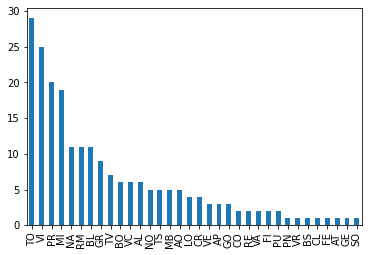

In [1404]:
freqpres.plot.bar()

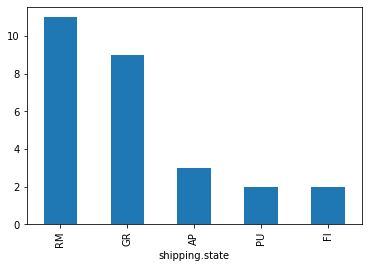

In [1405]:
freqcentropres.plot.bar()

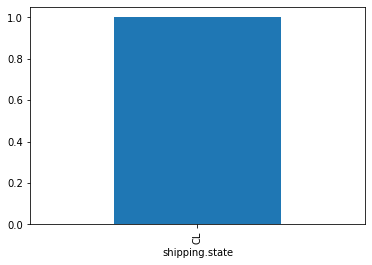

In [1406]:
freqisolepres.plot.bar()

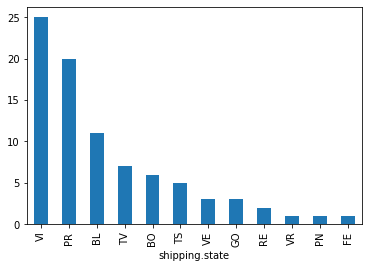

In [1407]:
freqnordestpres.plot.bar()

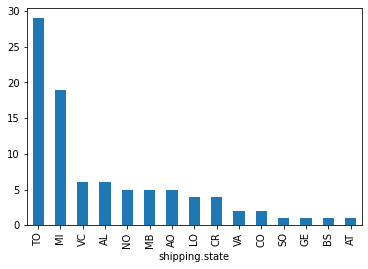

In [1408]:
freqnordovestpres.plot.bar()

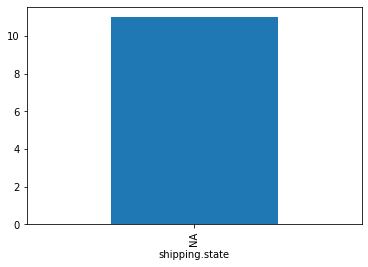

In [1409]:
freqsudpres.plot.bar()

In [1410]:
pres_area={'Area': ['Nord est','Nord ovest','Centro','Sud','Isole'],'Freq_A':[sum_nordestpres,sum_nordovestpres,sum_centropres,sum_sudpres,sum_isolepres]}
df_areapres=pd.DataFrame(pres_area,columns=['Area','Freq_A'])
print(df_areapres)

         Area  Freq_A
0    Nord est      85
1  Nord ovest      91
2      Centro      27
3         Sud      11
4       Isole       1


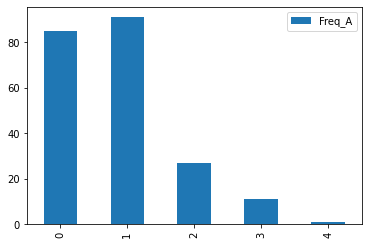

In [1411]:
df_areapres.plot.bar()

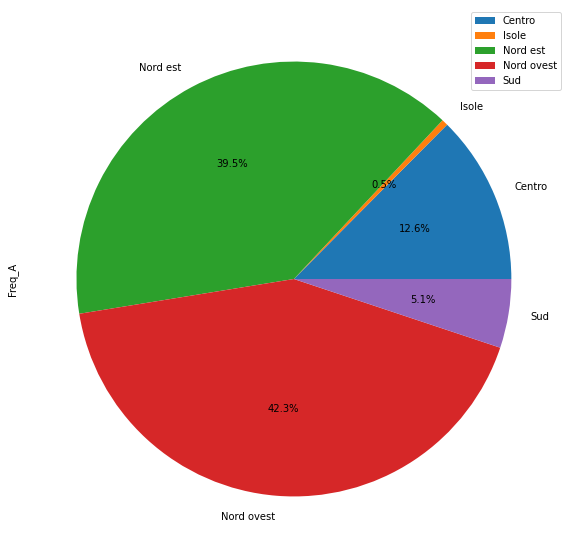

In [1412]:
df_areapres.groupby(['Area']).sum().plot(kind='pie',y='Freq_A',figsize=(15,10),autopct='%1.1f%%')

As can be seen in the pie chart, the highest number of orders comes from the Northern areas(42,3% Nord ovest, 39,5% Nord est). 
The cities with the highest number of oil orders are: Turin(29), Milan(19) and Vicenza(25). 

The Centre area accounts for 12,6% of the orders, followed by the South area with 5,1%. 

As shown in task 8, the wine and oil products are not highly correlated with preserves, therefore customers buying preserves not necessarily buy other types of products. 